# Case study: binary classification problem of quantum separability of states
### Ana Martínez Sabiote

The quantum separability problem consists in deciding whether a bipartite density matrix is entangled or separable. Finding the Schmidt decomposition of a state to determine if its separable or not is an NP-hard problem. In this notebook we will propose QSVM and QNN methods to tackle problem as a binary classification task using the data produced by https://gitlab.lis-lab.fr/balthazar.casale/ML-Quant-Sep

This repository publishes two fully labeled datasets of 6,000 bipartite density matrices. The first contains density matrices of dimension 9 × 9 of a bipartite quantum system $H=H_a \otimes H_b$, with $\rho_a = \dim(H_a) = 3 $ and $\rho_b =\dim(H_b)=3$ . The second is composed of density matrices of size 49 × 49, thus $\rho_a = \rho_b = 7$. Each dataset is a collection of pairs of input density matrices and labels indicating whether the corresponding density matrix is separable or entangled, and contains separable (SEP), PPT entangled (PPT-ENT) and non-PPT (NPPT-ENT) density matrices with 2,000 examples each.

We will constraint our experimentation to the first dataset for a bipartite system of $\rho_a =\rho_b = 3$.

We will start taking 100 samples of each label to form our training dataset, resulting in a perfectly balanced dataset. Using the code from the repository, we have read the separable data, PPT entangled data and NPPT entangled data and joined them to make a np.ndarray of 200  density matrix of dimensions 9 x 9. Then, the representations.py module has been used to transform the np.ndarray of density matrices into a real-valued vector of 200 samples and 80 attributes. We have saved this arrays into a csv file. An analogous process has been performed for creating the test set.

We can deal with 200 data instances, but the challenging aspect of this problem is the amount of attributes. For applying the quantum machine learning techniques we have studied, we firstly need to encode this great number of features.

# 0 - Work setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pennylane==0.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.9 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 89.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
pip install pyyaml h5py

In [ ]:
import pandas as pd
import numpy as np
import pennylane as qml
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import KFold

import seaborn as sns

import joblib

In [ ]:
# pennylane works with doubles and tensorflow works with floats.
# We ask tensorflow to work with doubles

tf.keras.backend.set_floatx('float64')

# 1 - PRE-WORK to get started

## 1. Data preprocessing


Overview of the dataset description. Should we normalise or scale the values? they are all really close to 0.

In [ ]:
training_data = pd.read_csv("/content/drive/MyDrive/tfg/x_train_1.csv", header=None)
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.002405,-0.013551,0.014313,0.007182,-0.008649,-0.003936,-0.002174,-0.000016,0.003090,-0.003370,...,-0.018256,0.002256,-0.108403,-0.010374,0.045722,0.076358,0.083020,0.093225,0.105654,0.109198
1,-0.006249,0.010679,-0.000343,-0.003259,-0.001029,-0.008732,-0.002129,-0.002200,-0.024872,-0.005728,...,-0.000787,0.012122,-0.136477,-0.005970,0.061884,0.080446,0.095130,0.103344,0.103996,0.110223
2,0.012010,0.006747,0.006879,0.000910,-0.001017,-0.003304,-0.003681,-0.002408,0.013087,-0.001269,...,-0.000877,-0.022158,-0.083370,0.003106,0.028129,0.060973,0.073608,0.078672,0.095634,0.102708
3,-0.147372,-0.009079,-0.008336,-0.021830,-0.012960,-0.004989,0.054233,0.023192,-0.047197,0.036500,...,-0.025876,0.004845,-0.231384,-0.021006,0.105213,0.087479,0.105942,0.130937,0.111882,0.118560
4,-0.010161,-0.021211,-0.009640,-0.004726,0.000182,-0.013206,-0.001762,-0.003612,0.014282,-0.003507,...,-0.002664,-0.030178,-0.124391,0.010869,0.055780,0.075803,0.095085,0.105444,0.107857,0.114460


In [ ]:
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.004797,0.000064,0.000108,-0.000144,0.000498,0.001381,0.001512,-0.000205,-0.000756,-0.000255,...,0.002235,0.000259,-0.111843,0.002390,0.045002,0.070573,0.086930,0.097276,0.106195,0.112494
std,0.028860,0.029620,0.036638,0.025325,0.026439,0.032549,0.028576,0.022098,0.032662,0.024387,...,0.028777,0.029612,0.024491,0.018366,0.017857,0.015019,0.012610,0.013057,0.010411,0.008404
min,-0.147372,-0.081901,-0.187091,-0.069290,-0.080485,-0.159721,-0.083676,-0.084355,-0.134501,-0.074572,...,-0.074319,-0.075645,-0.231384,-0.046467,-0.007201,-0.002491,0.046614,0.057148,0.059018,0.070539
25%,-0.011422,-0.019337,-0.015301,-0.011488,-0.010467,-0.014435,-0.010325,-0.008770,-0.016893,-0.008527,...,-0.013438,-0.018588,-0.123668,-0.008539,0.033558,0.061522,0.079547,0.091099,0.100307,0.108088
50%,0.005595,0.000423,0.000219,-0.000011,-0.000762,0.001258,0.000081,-0.000631,0.002140,0.000014,...,0.000568,0.002061,-0.110405,0.002893,0.045273,0.071863,0.086344,0.096756,0.107006,0.112603
75%,0.024328,0.016108,0.018386,0.007331,0.010476,0.018243,0.011555,0.008058,0.016492,0.011480,...,0.016144,0.016673,-0.098520,0.012143,0.055771,0.079165,0.094680,0.104528,0.111522,0.116679
max,0.078962,0.099702,0.170843,0.073404,0.087689,0.114851,0.100578,0.079129,0.109240,0.095401,...,0.137517,0.104468,-0.060092,0.113056,0.105627,0.119772,0.129452,0.162879,0.162101,0.152014


In [ ]:
x_train = np.genfromtxt("/content/drive/MyDrive/tfg/x_train_1.csv", delimiter=",",dtype=None)
y_train = np.genfromtxt("/content/drive/MyDrive/tfg/y_train_1.csv", delimiter=",",dtype=None)

x_test_small = np.genfromtxt("/content/drive/MyDrive/tfg/x_test_small.csv", delimiter=",",dtype=None)
y_test_small = np.genfromtxt("/content/drive/MyDrive/tfg/y_test_small.csv", delimiter=",",dtype=None)

In [ ]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)

print(type(x_test_small))
print(type(y_test_small))
print(x_test_small.shape)
print(y_test_small.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 80)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(300, 80)
(300,)


## 2. Quantum support vector machines

In [ ]:
# Amplitude encoding of 80 variables using 7 qubits (can encode up to 128 inputs)

# Number of qubits of the system
nqubits = 7
# We define a device
dev = qml.device("lightning.qubit", wires = nqubits)

# We define de circuit of our kernel. We use AmplitudeEmbedding which returns an
# operation equivalent to amplitude encoding of the first argument
# Since the vector has 80 components which is not a power of 2, we extend the vector
# to 128 components using padding with 0.
@qml.qnode(dev)
def kernel_circ(a,b):
    qml.AmplitudeEmbedding(a, wires=range(nqubits), pad_with=0, normalize=True)
    # Computes the adjoint (or inverse) of the amplitude encoding of b
    qml.adjoint(qml.AmplitudeEmbedding(b, wires=range(nqubits), pad_with=0, normalize=True))    # We return an array with the probabilities fo measuring each possible state in the
    # computational basis
    return qml.probs(wires=range(nqubits))

In [ ]:
# Check that the circuit works as expected
k=kernel_circ(x_train[0], x_train[1])
print(k.shape)

(128,)


In [ ]:
# Checking we get a 1 in the first entry of the returned array when the two arguments are the same
kernel_circ(x_train[0], x_train[0])

tensor([1.00000000e+00, 7.40406749e-32, 1.66038413e-32, 1.38834029e-32,
        4.92602587e-33, 1.42263375e-32, 1.88747586e-31, 4.36044173e-32,
        2.17002800e-31, 9.27505895e-34, 5.51240127e-34, 7.05721964e-34,
        6.50308965e-34, 1.43933593e-34, 7.19684987e-33, 1.47074826e-34,
        1.44791761e-33, 2.65820662e-35, 3.90084334e-34, 2.80193571e-36,
        1.04897582e-35, 1.64817515e-35, 1.77515598e-34, 3.52756956e-35,
        3.25817243e-35, 7.30560888e-34, 3.78720604e-34, 4.71415241e-35,
        1.38290224e-34, 1.04014788e-34, 1.51365404e-35, 2.21188675e-35,
        1.02753727e-35, 5.27990636e-35, 9.51139286e-34, 4.84866071e-35,
        1.64107679e-35, 5.83344878e-37, 4.56124070e-36, 1.47571781e-35,
        1.60309240e-34, 1.87654773e-34, 1.51159182e-34, 3.92728288e-35,
        2.14213234e-34, 1.13132531e-35, 3.11577401e-35, 1.15339781e-34,
        2.79030897e-34, 5.59576193e-35, 4.48432691e-35, 5.37026147e-36,
        2.97870992e-35, 2.21877597e-34, 1.36652637e-34, 1.422593

Even if amplitude encoding can be computed, then it takes more than 1h execture the following cell to train the SVM (16384 iterations).

In [ ]:
"""
from sklearn.svm import SVC
def qkernel(A, B):
  return np.array([[kernel_circ(a,b)[0] for b in B] for a in A])

svm = SVC(kernel = qkernel).fit(x_train, y_train)
"""

In [ ]:
"""
from sklearn.metrics import accuracy_score
print(accuracy_score(svm.predict(x_test), y_test))
"""

'\nfrom sklearn.metrics import accuracy_score\nprint(accuracy_score(svm.predict(x_test), y_test))\n'

Therefore, its needed to apply some dimensionality reduction techniques to work with less attributes such as principal component analysis or autoencoding.

Then, regarding embeddings (encoding input features into the quantum state of the circuit)
- Amplitude encoding: we need n qubits for $N \leq 2^n$ attributes.
- Angle enconding: it encodes N  features into the rotation angles of n
 qubits, where $N \leq n$. The other built in encodings that PennyLane offers need a number of qubits greater or equal to the number of features. Since we have so many attributes, even if we reduce its dimensionality, I think we would need too many qubits for applying this kind of encoding.

### PCA (64) with amplitude encoding
Next, we are goint to try a different approach: reducing the dimensionality of a dataset while minimizing information loss. We will use principal component analysis to reduce the number of variables in our dataset from 80 to 64, to apply amplitude enconding on 6 qubits instead of 7.

In [ ]:
pca = PCA(n_components = 64)

xs_train = pca.fit_transform(x_train)
xs_test = pca.transform(x_test)

In [ ]:
print(xs_train.shape)

(200, 64)


In [ ]:
# Amplitude encoding of 64 variables using 6 qubits (can encode up to 64 inputs)

# Number of qubits of the system
nqubits = 6
# We define a device
dev = qml.device("lightning.qubit", wires = nqubits)

# We define de circuit of our kernel. We use AmplitudeEmbedding which returns an
# operation equivalent to amplitude encoding of the first argument
@qml.qnode(dev)
def kernel_circ(a,b):
    qml.AmplitudeEmbedding(a, wires=range(nqubits), pad_with=0, normalize=True)
    # Computes the adjoint (or inverse) of the amplitude encoding of b
    qml.adjoint(qml.AmplitudeEmbedding(b, wires=range(nqubits), pad_with=0, normalize=True))    # We return an array with the probabilities fo measuring each possible state in the
    # computational basis
    return qml.probs(wires=range(nqubits))

In [ ]:
# Check that the circuit works as expected
ks=kernel_circ(xs_train[0], xs_train[1])
print(ks.shape)

(64,)


In [ ]:
def qkernel(A, B):
  return np.array([[kernel_circ(a,b)[0] for b in B] for a in A])

In [ ]:
svm = SVC(kernel = qkernel).fit(xs_train, y_train)

In [ ]:
xs_test_small = pca.transform(x_test_small)
print(accuracy_score(svm.predict(xs_test_small), y_test_small))

1.0


**Summary of this case**

PCA 64 attributes, amplitude encoding, lightning qubit device, 6 qubits

Accuracy on a test set of 300 instances is 1.0. Suspicious?

Training took 28 min

Prediction took 44 min


### PCA (32) with amplitude encoding

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train)
xs_test_small = pca.transform(x_test_small)

In [ ]:
# Amplitude encoding of 64 variables using 6 qubits (can encode up to 64 inputs)

# Number of qubits of the system
nqubits = 5
# We define a device
dev = qml.device("lightning.qubit", wires = nqubits)

# We define de circuit of our kernel. We use AmplitudeEmbedding which returns an
# operation equivalent to amplitude encoding of the first argument
@qml.qnode(dev)
def kernel_circ(a,b):
    qml.AmplitudeEmbedding(a, wires=range(nqubits), pad_with=0, normalize=True)
    # Computes the adjoint (or inverse) of the amplitude encoding of b
    qml.adjoint(qml.AmplitudeEmbedding(b, wires=range(nqubits), pad_with=0, normalize=True))    # We return an array with the probabilities fo measuring each possible state in the
    # computational basis
    return qml.probs(wires=range(nqubits))

In [ ]:
svm = SVC(kernel = qkernel).fit(xs_train, y_train)

In [ ]:
print(accuracy_score(svm.predict(xs_test_small), y_test_small))

0.9666666666666667


**Summary of this case**

PCA 32 attributes, amplitude encoding, lightning qubit device, 5 qubits

Accuracy on a test set of 300 instances is 0.9666

Training took 15 min

Prediction took 23 min

## 3. Quantum neural networks

In [ ]:
# We set a seed for the packages so the results are reproducible
seed=4321
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
def plot_losses(history):
  tr_loss = history.history["loss"]
  epochs = np.array(range(len(tr_loss))) + 1
  plt.plot(epochs, tr_loss, label="Training loss")
  plt.xlabel("Epoch")
  plt.show()

### PCA (32) with amplitude encoding, TwoLocal variational form, 5 qubits, default.qubit

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train)
xs_test_small = pca.transform(x_test_small)

In [ ]:
# Two local variational form
def TwoLocal(nqubits, theta, reps=1):
  for r in range(reps):
    for i in range(nqubits):
      qml.RY(theta[r*nqubits+i], wires=i)
    for i in range(nqubits-1):
      qml.CNOT(wires=[i,i+1])

  for i in range(nqubits):
    qml.RY(theta[reps*nqubits+i], wires=i)

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
nqubits=5
dev=qml.device("default.qubit", wires=nqubits)

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=1)
  return qml.expval(qml.Hermitian(M, wires=[0]))

qnn = qml.QNode(qnn_circuit, dev, interface="tf")

In [ ]:
weights={"theta": 10}
# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())


In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 27s 3s/step - loss: 1.0103
Epoch 2/50
10/10 [==============================] - 35s 3s/step - loss: 0.9998
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 0.9870
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 0.9712
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.9551
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.9339
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.9135
Epoch 8/50
10/10 [==============================] - 17s 2s/step - loss: 0.8868
Epoch 9/50
10/10 [==============================] - 17s 2s/step - loss: 0.8617
Epoch 10/50
10/10 [==============================] - 16s 2s/step - loss: 0.8345
Epoch 11/50
10/10 [==============================] - 17s 2s/step - loss: 0.8096
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.7836
Epoch 13/50
10/10 [==============================

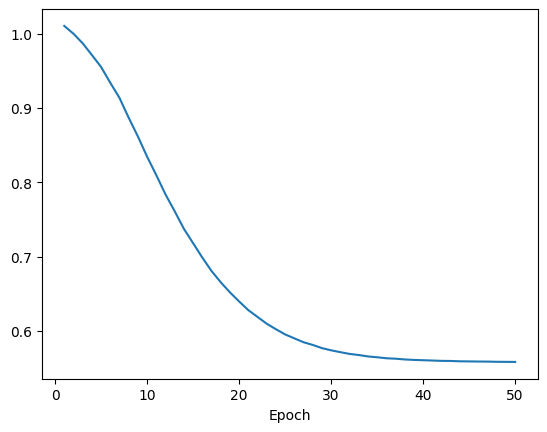

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(xs_train) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(xs_test_small) >= 0.5, y_test_small)

10/10 [==============================] - 13s 1s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.715
Test accuracy:  0.5966666666666667


Test accuracy is not great.

Aspects to consider
- Training time 15 min
- We can try other NN architectures, looking at paper Entanglement detection using Deep Neural networks
- We don't have validation set!

### PCA (32) with amplitude encoding, StronglyEntanglingLayers, default.qubit

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train)
xs_test_small = pca.transform(x_test_small)

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
nqubits=5
dev = qml.device("default.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

qnn_strong = qml.QNode(qnn_circuit_strong, dev)

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 31s 3s/step - loss: 0.7821
Epoch 2/50
10/10 [==============================] - 31s 3s/step - loss: 0.7751
Epoch 3/50
10/10 [==============================] - 32s 3s/step - loss: 0.7659
Epoch 4/50
10/10 [==============================] - 29s 3s/step - loss: 0.7577
Epoch 5/50
10/10 [==============================] - 31s 3s/step - loss: 0.7481
Epoch 6/50
10/10 [==============================] - 31s 3s/step - loss: 0.7380
Epoch 7/50
10/10 [==============================] - 29s 3s/step - loss: 0.7297
Epoch 8/50
10/10 [==============================] - 30s 3s/step - loss: 0.7211
Epoch 9/50
10/10 [==============================] - 31s 3s/step - loss: 0.7121
Epoch 10/50
10/10 [==============================] - 31s 3s/step - loss: 0.7047
Epoch 11/50
10/10 [==============================] - 28s 3s/step - loss: 0.6982
Epoch 12/50
10/10 [==============================] - 30s 3s/step - loss: 0.6919
Epoch 13/50
10/10 [==============================

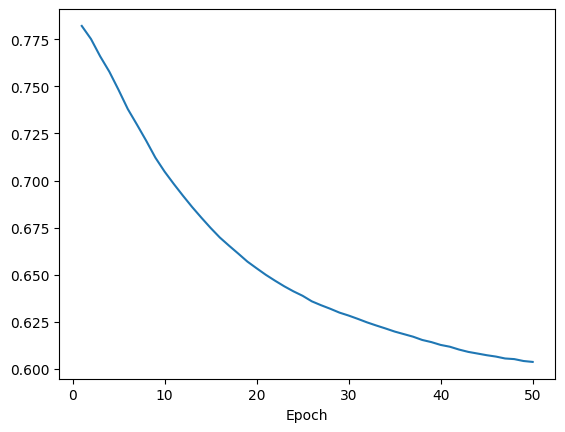

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(xs_train) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(xs_test_small) >= 0.5, y_test_small)

10/10 [==============================] - 22s 2s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.715
Test accuracy:  0.5733333333333334


Using StronglyEntanglingLayers the accuracy is basically identical to the previous case.

Observation, lightning.qubit in this case raises unknown error in tensorflow.

Training 25 minutes

### PCA (32) with amplitude encoding, StronglyEntanglingLayers, lightning.qubit and adjoind differentiation method


In [ ]:
nqubits=5
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))


# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())



In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 15s 2s/step - loss: 0.7821
Epoch 2/50
10/10 [==============================] - 8s 835ms/step - loss: 0.7751
Epoch 3/50
10/10 [==============================] - 15s 1s/step - loss: 0.7659
Epoch 4/50
10/10 [==============================] - 14s 1s/step - loss: 0.7577
Epoch 5/50
10/10 [==============================] - 14s 1s/step - loss: 0.7481
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 0.7380
Epoch 7/50
10/10 [==============================] - 9s 832ms/step - loss: 0.7297
Epoch 8/50
10/10 [==============================] - 14s 2s/step - loss: 0.7211
Epoch 9/50
10/10 [==============================] - 14s 1s/step - loss: 0.7121
Epoch 10/50
10/10 [==============================] - 14s 1s/step - loss: 0.7047
Epoch 11/50
10/10 [==============================] - 8s 810ms/step - loss: 0.6982
Epoch 12/50
10/10 [==============================] - 22s 2s/step - loss: 0.6919
Epoch 13/50
10/10 [========================

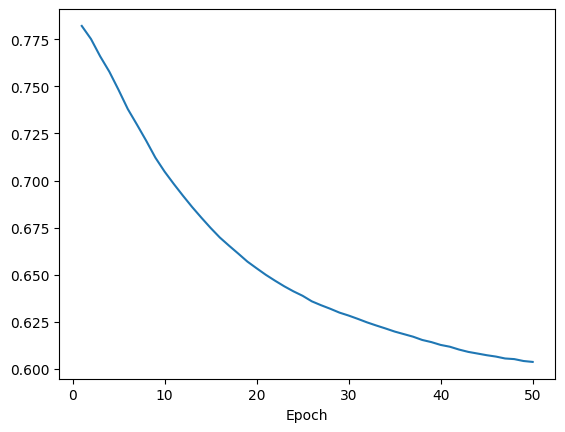

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(xs_train) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(xs_test_small) >= 0.5, y_test_small)

10/10 [==============================] - 12s 1s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.715
Test accuracy:  0.5733333333333334


No improvements on accuracy, exact performance, which makes sense because we are running the exact same configuration. Although using lightning.qubit with adjoint differenciation method increases significantly the speed (averagely per epoch 30s -> 14s)

Training 11 minutes


### PCA (64) with amplitude encoding, StronglyEntanglingLayers, lightning.qubit and adjoint differentiation method

In [ ]:
pca = PCA(n_components = 64)

xs_train = pca.fit_transform(x_train)
xs_test_small = pca.transform(x_test_small)

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
nqubits=6
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())


In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 0.7342
Epoch 2/50
10/10 [==============================] - 16s 2s/step - loss: 0.7331
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 0.7320
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 0.7310
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.7298
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 0.7286
Epoch 7/50
10/10 [==============================] - 16s 2s/step - loss: 0.7270
Epoch 8/50
10/10 [==============================] - 16s 2s/step - loss: 0.7254
Epoch 9/50
10/10 [==============================] - 16s 2s/step - loss: 0.7238
Epoch 10/50
10/10 [==============================] - 16s 2s/step - loss: 0.7212
Epoch 11/50
10/10 [==============================] - 17s 2s/step - loss: 0.7189
Epoch 12/50
10/10 [==============================] - 16s 2s/step - loss: 0.7169
Epoch 13/50
10/10 [==============================

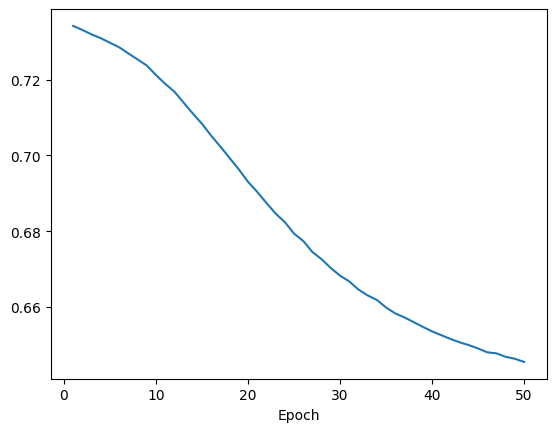

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(xs_train) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(xs_test_small) >= 0.5, y_test_small)

10/10 [==============================] - 15s 2s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.66
Test accuracy:  0.63


Still not great accuracies even if we are working with more attributes (64). Since the training time was only 13 min thanks to the configuration of lightning.qubit + adjoint differentiation method, we can afford to try with 7 qubits and the original attributes, without reducing dimensionality with PCA.

### 80 attributes, 7 qubits, lightning.qubit and adjoint differentiation method

In [ ]:
nqubits=7
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(x_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 17s 2s/step - loss: 0.6943
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 0.6879
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.6812
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.6767
Epoch 5/50
10/10 [==============================] - 17s 2s/step - loss: 0.6730
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.6697
Epoch 7/50
10/10 [==============================] - 23s 2s/step - loss: 0.6677
Epoch 8/50
10/10 [==============================] - 18s 2s/step - loss: 0.6648
Epoch 9/50
10/10 [==============================] - 19s 2s/step - loss: 0.6634
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.6609
Epoch 11/50
10/10 [==============================] - 18s 2s/step - loss: 0.6593
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.6576
Epoch 13/50
10/10 [==============================

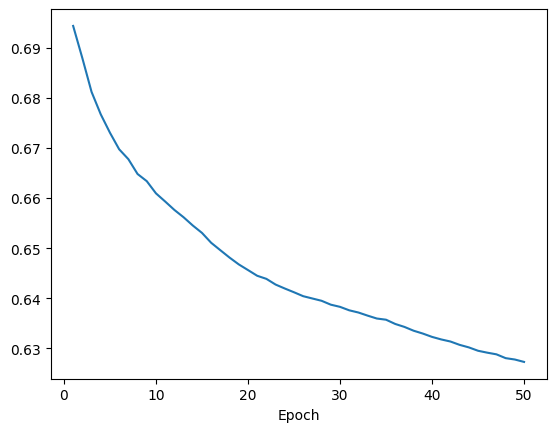

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(xs_train) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(xs_test_small) >= 0.5, y_test_small)

10/10 [==============================] - 16s 2s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.475
Test accuracy:  0.48333333333333334


Terrible results

**Possible directions to continue**  
- Incorporating data preprocessing, since all the attributes have values really really close to 0
- Using other possible feature maps and dimensionality reduction techniques
- Study the accuracy of each type of data (SEP, PPT-ENT and NPPT-ENT)
- Generate dataset with different proportions of PPT-ENT and NPPT-ENT as done in the paper, train svm's with those variations of the dataset and compare the accuracy of those svm's.
- another test_small dataset because it is not balanced. We are training with a perfectly balanced set and testing with a 1:2 dataset.
- a different QNN architecture


In [ ]:
scaler = MaxAbsScaler()
x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test_small)

# Restrict all the values to be between 0 and 1
x_test_norm = np.clip(x_test_norm,0,1)


### Normalized data, 80 attributes, 7 qubits, lightning.qubit and adjoint differentiation method

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
nqubits=7
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(x_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 81s 8s/step - loss: 0.5945
Epoch 2/50
10/10 [==============================] - 16s 2s/step - loss: 0.5922
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 0.5887
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 0.5862
Epoch 5/50
10/10 [==============================] - 34s 4s/step - loss: 0.5841
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 0.5826
Epoch 7/50
10/10 [==============================] - 16s 2s/step - loss: 0.5817
Epoch 8/50
10/10 [==============================] - 16s 2s/step - loss: 0.5802
Epoch 9/50
10/10 [==============================] - 16s 1s/step - loss: 0.5799
Epoch 10/50
10/10 [==============================] - 18s 1s/step - loss: 0.5787
Epoch 11/50
10/10 [==============================] - 19s 2s/step - loss: 0.5783
Epoch 12/50
10/10 [==============================] - 16s 2s/step - loss: 0.5777
Epoch 13/50
10/10 [==============================

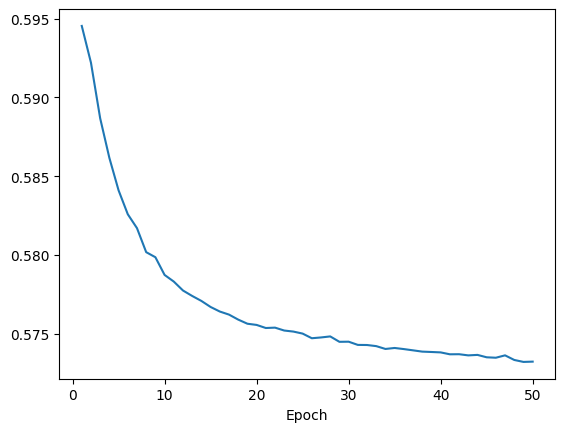

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy

tr_acc = accuracy_score(model.predict(x_train_norm) >= 0.5, y_train)
test_acc = accuracy_score(model.predict(x_test_norm) >= 0.5, y_test_small)

10/10 [==============================] - 13s 1s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.545
Test accuracy:  0.3333333333333333


Even worst!

10/10 [==============================] - 16s 1s/step


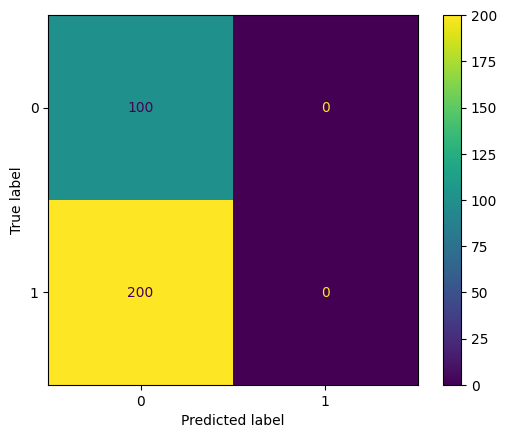

In [ ]:
cm = confusion_matrix(y_test_small, model.predict(x_test_norm) >= 0.5)

cm_display = ConfusionMatrixDisplay(cm).plot()

It predicts all states separable, it doesn't detect entanglement at all. Let's see it it is because overfitting

7/7 [==============================] - 8s 1s/step


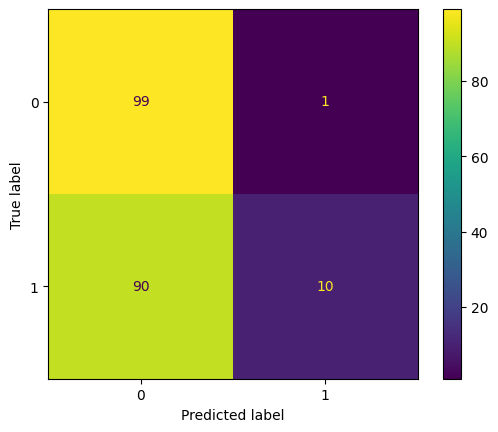

In [ ]:
cm = confusion_matrix(y_train, model.predict(x_train_norm) >= 0.5)

cm_display = ConfusionMatrixDisplay(cm).plot()

With the training set it does not predict entanglement either

### Normalized data, 80 attributes, 7 qubits, lightning.qubit,adjoint differentiation method and 4 repetitions in each instance of the variational form

In [ ]:
# number of repetitions that we want in each instance of the variational form
nreps = 4
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(x_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 28s 3s/step - loss: 0.7134
Epoch 2/50
10/10 [==============================] - 27s 3s/step - loss: 0.7089
Epoch 3/50
10/10 [==============================] - 22s 2s/step - loss: 0.7044
Epoch 4/50
10/10 [==============================] - 27s 3s/step - loss: 0.7005
Epoch 5/50
10/10 [==============================] - 22s 2s/step - loss: 0.6961
Epoch 6/50
10/10 [==============================] - 27s 3s/step - loss: 0.6900
Epoch 7/50
10/10 [==============================] - 22s 2s/step - loss: 0.6827
Epoch 8/50
10/10 [==============================] - 27s 2s/step - loss: 0.6717
Epoch 9/50
10/10 [==============================] - 27s 3s/step - loss: 0.6614
Epoch 10/50
10/10 [==============================] - 22s 2s/step - loss: 0.6477
Epoch 11/50
10/10 [==============================] - 27s 3s/step - loss: 0.6369
Epoch 12/50
10/10 [==============================] - 22s 2s/step - loss: 0.6271
Epoch 13/50
10/10 [==============================

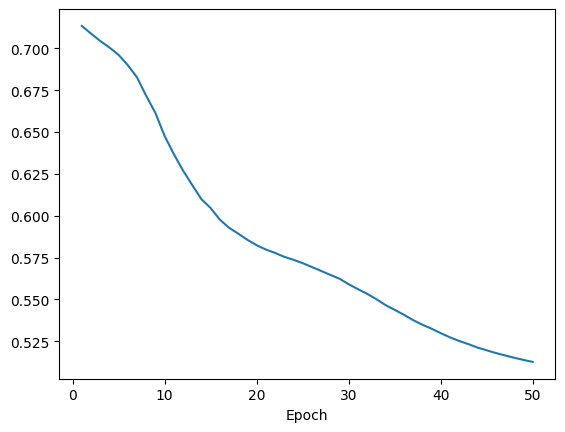

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy
y_train_pred=model.predict(x_train_norm) >= 0.5
y_test_pred=model.predict(x_test_norm) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 17s 2s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.615
Test accuracy:  0.38666666666666666


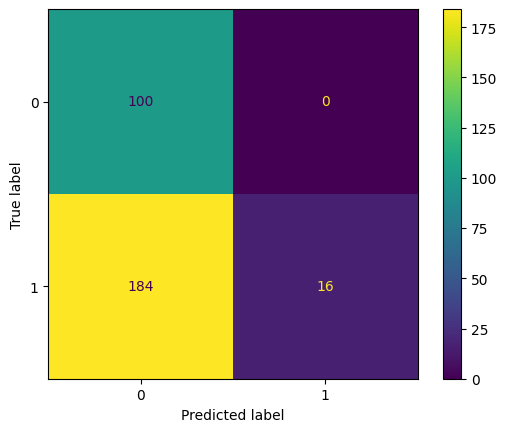

In [ ]:
cm = confusion_matrix(y_test_small, y_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

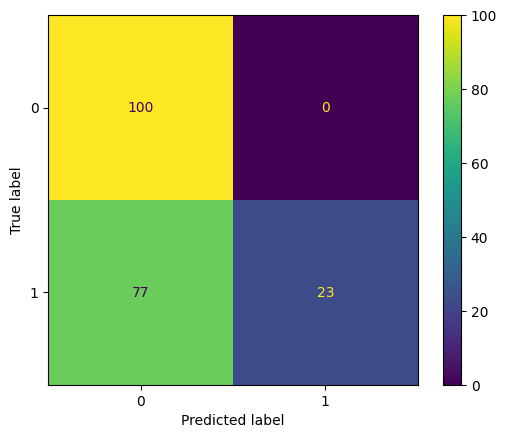

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Not much improvement, still absolutely terrible accuracy. Let's discard this QNN with 80 attributes and 7 qubits

### PCA (32) with amplitude encoding, Twolocal variational form, 5 qubits, lightning.qubit, adjoint differentiation method

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train_norm)
xs_test_small = pca.transform(x_test_norm)

In [ ]:
# Two local variational form
def TwoLocal(nqubits, theta, reps=1):
  for r in range(reps):
    for i in range(nqubits):
      qml.RY(theta[r*nqubits+i], wires=i)
    for i in range(nqubits-1):
      qml.CNOT(wires=[i,i+1])

  for i in range(nqubits):
    qml.RY(theta[reps*nqubits+i], wires=i)

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=1)
  return qml.expval(qml.Hermitian(M, wires=[0]))



In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

weights={"theta": 10}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())


In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 8s 657ms/step - loss: 0.7572
Epoch 2/50
10/10 [==============================] - 8s 892ms/step - loss: 0.7548
Epoch 3/50
10/10 [==============================] - 6s 539ms/step - loss: 0.7521
Epoch 4/50
10/10 [==============================] - 4s 432ms/step - loss: 0.7496
Epoch 5/50
10/10 [==============================] - 9s 978ms/step - loss: 0.7476
Epoch 6/50
10/10 [==============================] - 4s 442ms/step - loss: 0.7450
Epoch 7/50
10/10 [==============================] - 9s 1s/step - loss: 0.7431
Epoch 8/50
10/10 [==============================] - 4s 440ms/step - loss: 0.7400
Epoch 9/50
10/10 [==============================] - 5s 471ms/step - loss: 0.7376
Epoch 10/50
10/10 [==============================] - 10s 1s/step - loss: 0.7340
Epoch 11/50
10/10 [==============================] - 4s 430ms/step - loss: 0.7303
Epoch 12/50
10/10 [==============================] - 9s 991ms/step - loss: 0.7249
Epoch 13/50
10/10 [===========

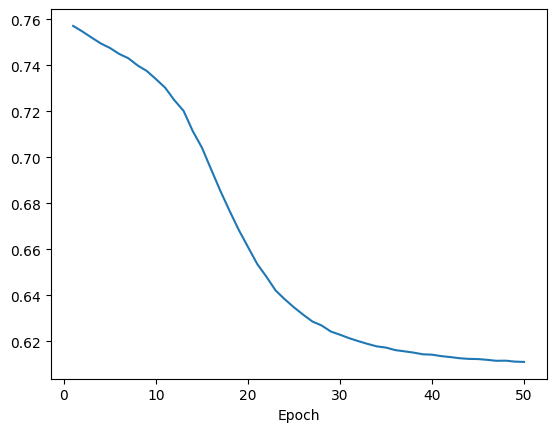

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy
y_train_pred=model.predict(xs_train) >= 0.5
y_test_pred=model.predict(xs_test_small) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 4s 391ms/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.665
Test accuracy:  0.47333333333333333


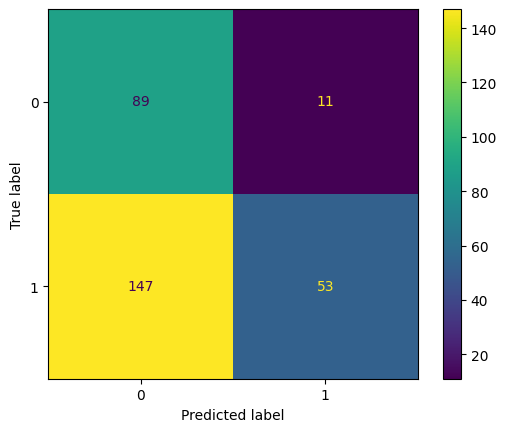

In [ ]:
cm = confusion_matrix(y_test_small, y_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

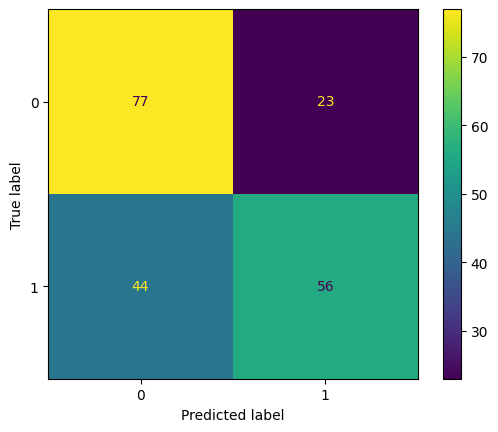

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Normalization doesn't improve the original

### PCA (32) with amplitude encoding, Twolocal variational form 5 REPS, 5 qubits, lightning.qubit, adjoint differentiation method

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=5

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 72s 8s/step - loss: 0.7548
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 0.7480
Epoch 3/50
10/10 [==============================] - 8s 766ms/step - loss: 0.7411
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 0.7322
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 0.7241
Epoch 6/50
10/10 [==============================] - 8s 778ms/step - loss: 0.7130
Epoch 7/50
10/10 [==============================] - 12s 752ms/step - loss: 0.7029
Epoch 8/50
10/10 [==============================] - 13s 1s/step - loss: 0.6895
Epoch 9/50
10/10 [==============================] - 13s 1s/step - loss: 0.6776
Epoch 10/50
10/10 [==============================] - 8s 773ms/step - loss: 0.6644
Epoch 11/50
10/10 [==============================] - 12s 1s/step - loss: 0.6516
Epoch 12/50
10/10 [==============================] - 13s 1s/step - loss: 0.6394
Epoch 13/50
10/10 [=====================

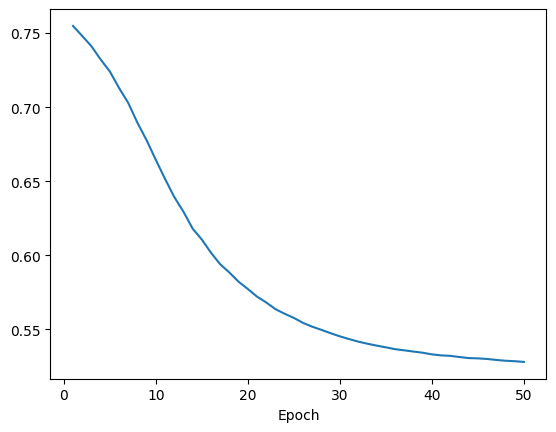

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy
y_train_pred=model.predict(xs_train) >= 0.5
y_test_pred=model.predict(xs_test_small) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 14s 1s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.8
Test accuracy:  0.5633333333333334


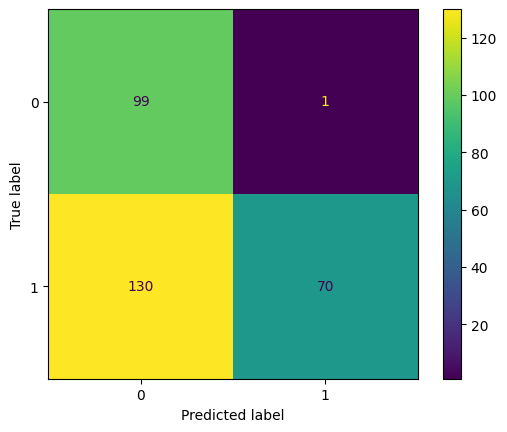

In [ ]:
cm = confusion_matrix(y_test_small, y_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

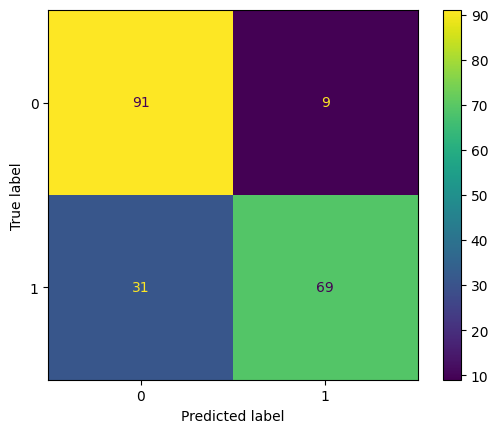

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Increase in the number of repetitions produces an increase in the accuracy of the model. Let's try with more repetitions

### PCA (32) with amplitude encoding, Twolocal variational form 10 REPS, 5 qubits, lightning.qubit, adjoint differentiation method

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=10

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 0.7584
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 0.7429
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.7253
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.7032
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.6782
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.6498
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 0.6256
Epoch 8/50
10/10 [==============================] - 18s 2s/step - loss: 0.5988
Epoch 9/50
10/10 [==============================] - 18s 2s/step - loss: 0.5824
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.5671
Epoch 11/50
10/10 [==============================] - 15s 2s/step - loss: 0.5570
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.5487
Epoch 13/50
10/10 [==============================

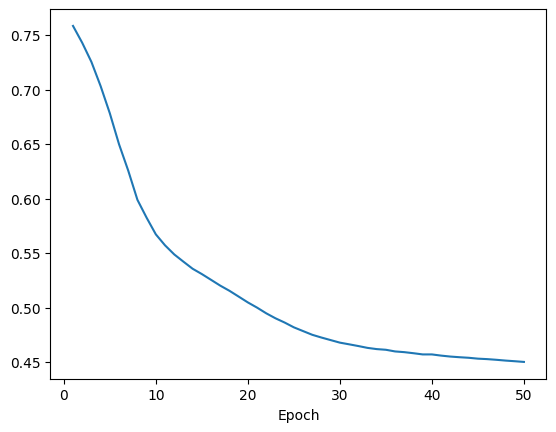

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy
y_train_pred=model.predict(xs_train) >= 0.5
y_test_pred=model.predict(xs_test_small) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 13s 1s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.885
Test accuracy:  0.7033333333333334


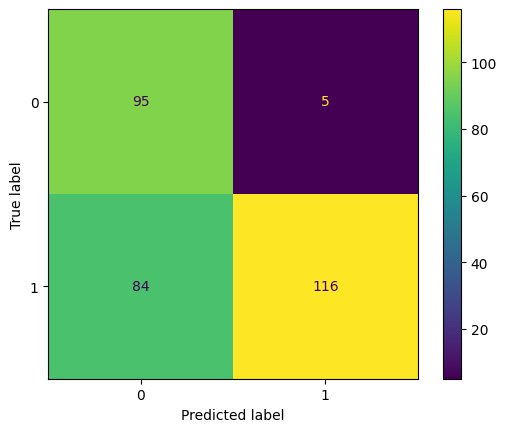

In [ ]:
cm = confusion_matrix(y_test_small, y_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

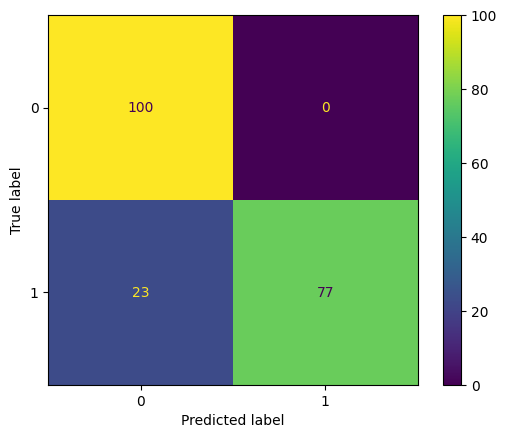

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
test_size=100
pred_split=np.array_split(y_test_pred,3)
y_sep_pred=pred_split[0]
y_ppt_pred=pred_split[1]
y_nppt_pred=pred_split[2]

score_sep = accuracy_score(y_sep_pred, np.full(test_size, 0))
score_ppt= accuracy_score(y_ppt_pred, np.full(test_size,1))
score_nppt= accuracy_score(y_nppt_pred, np.full(test_size,1))

print("SEP accuracy: ", score_sep)
print("PPT accuracy: ", score_ppt)
print("NPPT accuracy: ", score_nppt)

SEP accuracy:  0.95
PPT accuracy:  0.57
NPPT accuracy:  0.59


GREAT IMPROVEMENT!!!
Increasing the number of repetitions of TwoLocal variational form produces better accuracy. In this case with 10 repetitions we obtain 70% of accuracy on the test set, the highest so far for QNN.

Observing the confussion matrix of the test set, there is almost a 1:1 proportion of true possitives to false negatives. Remembering that 1 represents entanglement and those samples come from PPT-ENT and NPPT-ENT we can investigate if that amount of false negatives comes from our model making errors when predicting one of the types of entanglement

### PCA (32) with amplitude encoding, StrongEntanglingLayers 8 reps, lightning.qubit, 5 qubits, adjoint diff method

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train_norm)
xs_test_small = pca.transform(x_test_norm)

In [ ]:
nqubits=5
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 8
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 39s 4s/step - loss: 0.7059
Epoch 2/50
10/10 [==============================] - 33s 3s/step - loss: 0.6890
Epoch 3/50
10/10 [==============================] - 32s 3s/step - loss: 0.6716
Epoch 4/50
10/10 [==============================] - 40s 4s/step - loss: 0.6552
Epoch 5/50
10/10 [==============================] - 32s 3s/step - loss: 0.6380
Epoch 6/50
10/10 [==============================] - 30s 3s/step - loss: 0.6197
Epoch 7/50
10/10 [==============================] - 28s 3s/step - loss: 0.6033
Epoch 8/50
10/10 [==============================] - 32s 3s/step - loss: 0.5854
Epoch 9/50
10/10 [==============================] - 42s 4s/step - loss: 0.5729
Epoch 10/50
10/10 [==============================] - 32s 3s/step - loss: 0.5596
Epoch 11/50
10/10 [==============================] - 32s 3s/step - loss: 0.5500
Epoch 12/50
10/10 [==============================] - 32s 3s/step - loss: 0.5419
Epoch 13/50
10/10 [==============================

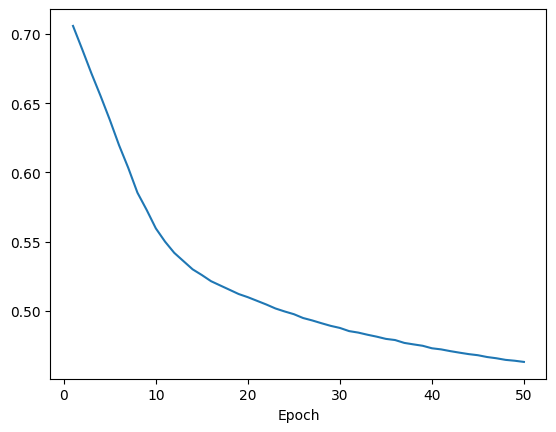

In [ ]:
plot_losses(history)

In [ ]:
# Check accuracy
y_train_pred=model.predict(xs_train) >= 0.5
y_test_pred=model.predict(xs_test_small) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 20s 2s/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.91
Test accuracy:  0.7233333333333334


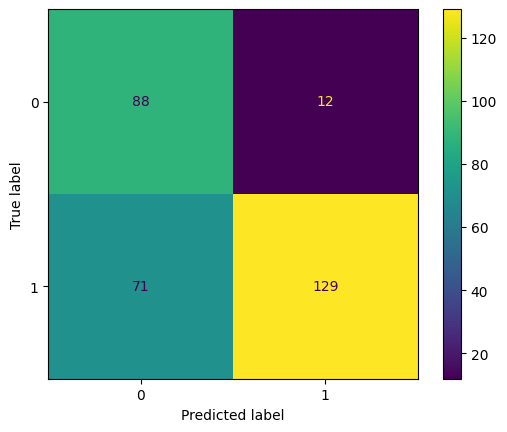

In [ ]:
cm = confusion_matrix(y_test_small, y_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

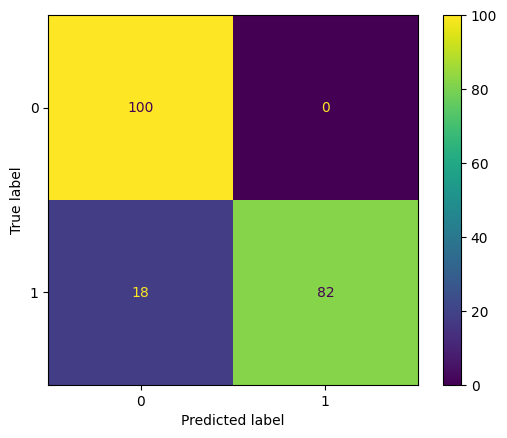

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Improvement with more repetitions (8) of strong entangling layers with normalized data PCA 32 attributes
Training 28 min

In [ ]:
test_size=100
pred_split=np.array_split(y_test_pred,3)
y_sep_pred=pred_split[0]
y_ppt_pred=pred_split[1]
y_nppt_pred=pred_split[2]

score_sep = accuracy_score(y_sep_pred, np.full(test_size, 0))
score_ppt= accuracy_score(y_ppt_pred, np.full(test_size,1))
score_nppt= accuracy_score(y_nppt_pred, np.full(test_size,1))

print("SEP accuracy: ", score_sep)
print("PPT accuracy: ", score_ppt)
print("NPPT accuracy: ", score_nppt)

SEP accuracy:  0.88
PPT accuracy:  0.69
NPPT accuracy:  0.6


# 2 - Case study: dataset with 0.5 PPT ratio

Replicating the working conditions from paper LARGE-SCALE QUANTUM SEPARABILITY THROUGH A
REPRODUCIBLE MACHINE LEARNING LENS, we will work with
- A training set of 200 samples: 100 separable and 100 entangled (with 0.5 ppt ratio, thus 50 samples ppt-ent and 50 samples nppt-ent). File *train_set_05.csv*
- A test set of 300 samples, 100 separable, 100 ppt-entangled and 100 nppt-entangled. It is a reduced version of the papers test set consisting in 1000 samples per type. File *test_set_small.csv*

Additionally, we will use 5 fold cross validation for the training process of the models.

In [ ]:
training_data = pd.read_csv("/content/drive/MyDrive/tfg/x_train_05.csv", header=None)
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.139035,0.008456,-0.082087,-0.019300,0.009335,0.050326,0.010913,-0.007922,0.045280,-0.024449,...,-0.028864,0.001750,-0.136610,0.014718,0.061386,0.077893,0.107214,0.120851,0.119377,0.126888
1,0.027434,-0.024593,-0.004040,-0.009824,0.003811,0.012059,0.013763,0.000587,0.014419,-0.007030,...,-0.045377,-0.034251,-0.111645,-0.011707,0.045268,0.065257,0.075945,0.086621,0.088141,0.100372
2,0.009734,0.003539,0.016788,0.005305,0.014389,0.013836,0.011906,0.000093,0.009230,0.000518,...,-0.017423,-0.038796,-0.078068,-0.001154,0.017251,0.065321,0.076891,0.090936,0.113257,0.113306
3,0.007171,0.000200,0.006113,-0.011893,-0.008216,0.047268,-0.002918,-0.004516,-0.004425,-0.008580,...,0.022474,-0.024791,-0.100311,0.024562,0.043498,0.080326,0.100310,0.101018,0.113511,0.120475
4,0.016754,0.088911,0.170843,0.007160,0.037591,-0.159721,-0.014413,-0.030534,-0.134501,0.007023,...,-0.013210,-0.035009,-0.061479,0.051629,0.052332,0.105790,0.112462,0.076749,0.107003,0.119324


In [ ]:
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.003763,-0.002582,-0.001872,0.003203,-0.002515,-0.001205,0.002167,0.000591,-0.001637,0.000220,...,-0.002490,0.001527,-0.111288,0.000398,0.045164,0.070316,0.086718,0.097140,0.105141,0.111583
std,0.035739,0.033113,0.033377,0.026297,0.026577,0.035588,0.028769,0.027405,0.032119,0.027221,...,0.032918,0.030256,0.023376,0.018821,0.015878,0.015222,0.012961,0.012903,0.011354,0.008890
min,-0.170321,-0.166935,-0.136005,-0.078350,-0.080244,-0.159721,-0.095292,-0.111329,-0.134501,-0.076634,...,-0.088351,-0.075934,-0.218482,-0.077149,0.003417,0.030168,0.055369,0.064312,0.083020,0.092286
25%,-0.016411,-0.022544,-0.016625,-0.007574,-0.014764,-0.015894,-0.008162,-0.009448,-0.016818,-0.009317,...,-0.020518,-0.015801,-0.121938,-0.010807,0.034259,0.060286,0.077316,0.088503,0.098364,0.105646
50%,0.001116,0.000261,0.000438,0.001154,-0.000650,-0.002426,0.001884,-0.000588,-0.001867,-0.000385,...,-0.001861,-0.000575,-0.110258,-0.000938,0.044941,0.069220,0.086392,0.096861,0.104572,0.111667
75%,0.022831,0.013867,0.016098,0.011541,0.007547,0.017720,0.010898,0.007674,0.015010,0.012375,...,0.015906,0.015757,-0.098090,0.011025,0.056210,0.080342,0.094364,0.104330,0.111644,0.116109
max,0.139035,0.096240,0.170843,0.102711,0.077133,0.117559,0.115419,0.095313,0.114589,0.073760,...,0.161773,0.112975,-0.057815,0.057662,0.094976,0.124962,0.136118,0.162879,0.162430,0.152799


In [ ]:
x_train = np.genfromtxt("/content/drive/MyDrive/tfg/x_train_05.csv", delimiter=",",dtype=None)
y_train = np.genfromtxt("/content/drive/MyDrive/tfg/y_train_05.csv", delimiter=",",dtype=None)

x_test_small = np.genfromtxt("/content/drive/MyDrive/tfg/x_test_small.csv", delimiter=",",dtype=None)
y_test_small = np.genfromtxt("/content/drive/MyDrive/tfg/y_test_small.csv", delimiter=",",dtype=None)

In [ ]:
print("Training set:")
print("Size of the training set ", x_train.shape)
print("Size of the corresponding labels ", y_train.shape)

print("\nTest set:")
print("Size of the test set ", x_test_small.shape)
print("Size of the corresponding labels ", y_test_small.shape)

Training set:
Size of the training set  (200, 80)
Size of the corresponding labels  (200,)

Test set:
Size of the test set  (300, 80)
Size of the corresponding labels  (300,)


## 1. Exploratory data analysis

We will use Principal Component Analysis to reduce the dimensionality of the dataset. Since we will use quantum machine learning techniques to build a classifier on this data, our first step in that process will be data embedding. There are different data encoding built-in functions in Pennylane, however, the only suitable one for our case is Amplitude embedding due to the constraint in the number of qubits we can use in the current simulators. Amplitude encoding allows us to codify $N \leq 2^n$ attributes with $n$  qubits. Our dataset has 80 attributes, with 7 qubits amplitude encoding could codify up to 128 attributes. In the initial testing, we have obtained best performance reducing the dimensionality of the dataset to 32 attributes using principal component analysis. This allows us to reduce to 5 qubits.

We will also check the effect of normalization on our dataset.

We will use the class *sklearn.decomposition.PCA*. First we will work with direclty with our data (no normalization)

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train)
xs_test = pca.transform(x_test_small)

Once trained, the PCA object contains all the information about the components. We fixed the number of components to 32. Next, we will analyse the three main components.

These three rows correspond to the three principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by decreasing *explained_variance_* (the amount of variance explained by each of the selected components)

In [ ]:
print(pca.components_.shape)

(32, 80)


In [ ]:
three_pc = pd.DataFrame(
    data=pca.components_[0:3],
    index = ['PC1', 'PC2', 'PC3']
)

In [ ]:
three_pc

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
PC1,-0.078923,0.138744,0.347397,-0.082156,-0.010084,-0.157959,0.018403,0.011076,-0.234739,0.002159,...,-0.191197,0.024889,0.002893,-0.052625,-0.025488,0.013009,-0.000893,-0.013329,-0.002820,-0.008094
PC2,-0.046127,0.056054,-0.006340,0.038842,0.018734,0.008609,-0.047358,0.054383,-0.062540,0.052193,...,0.018696,0.048671,0.027532,-0.040785,-0.016024,0.008447,-0.013036,-0.008851,0.007211,-0.004051
PC3,-0.261291,-0.176917,0.008989,0.012620,-0.057868,0.357191,0.029919,0.069691,0.107592,-0.051852,...,0.047707,0.187567,0.079903,0.003536,-0.072748,-0.062288,-0.055809,-0.027001,-0.009286,-0.014112


In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.05263381 0.0494832  0.04331597 0.03946737 0.03424476 0.03411636
 0.03268133 0.02931714 0.02839679 0.02712453 0.02636718 0.02459969
 0.02388274 0.02320542 0.02227055 0.02117816 0.02100179 0.02023511
 0.01923234 0.01888048 0.01842044 0.01773041 0.01685939 0.0162822
 0.01530907 0.01474871 0.01440209 0.01387777 0.01355994 0.01286114
 0.01243935 0.01218028]


In [ ]:
pca_df = pd.DataFrame(
    data = xs_train[:,0:3],
    columns = ['PC1', 'PC2', 'PC3']
)
pca_df = pd.concat([pca_df, pd.DataFrame(y_train, columns =['target'])[['target']]], axis=1)

In [ ]:
pca_df

,PC1,PC2,PC3,target
0,-0.089289,-0.052919,-0.008266,0.0
1,-0.016367,-0.006689,-0.012467,0.0
2,0.014952,0.042296,-0.025777,0.0
3,-0.031557,-0.017658,0.018171,0.0
4,0.326876,0.147360,-0.167084,0.0
...,...,...,...,...
195,0.032934,-0.044987,-0.048340,1.0
196,0.030219,0.039094,-0.039554,1.0
197,0.067205,-0.030824,0.026076,1.0
198,0.011818,-0.048264,-0.068982,1.0


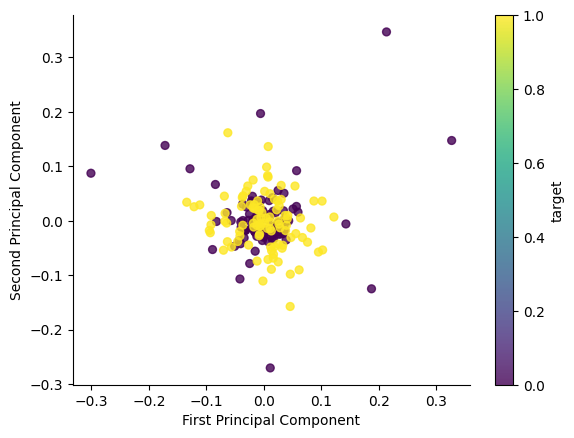

In [ ]:
pca_df.plot(kind='scatter', x='PC1', y='PC2', c='target', s=32, alpha=.8)
plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

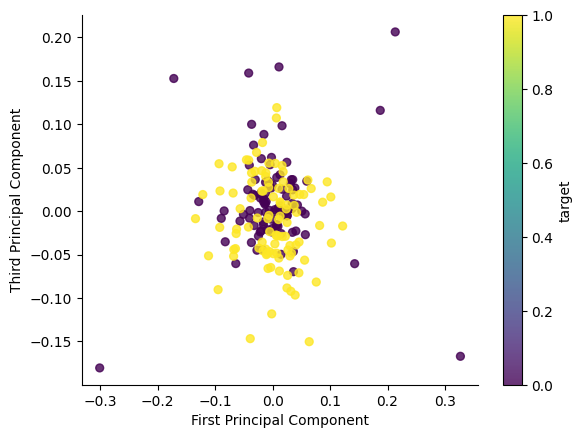

In [ ]:
pca_df.plot(kind='scatter', x='PC1', y='PC3', c='target', s=32, alpha=.8)
plt.xlabel('First Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

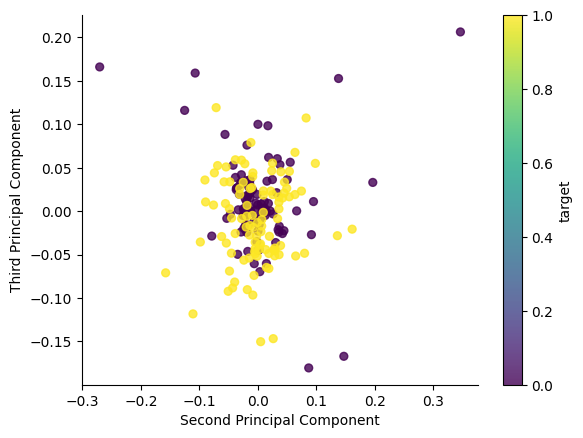

In [ ]:
pca_df.plot(kind='scatter', x='PC2', y='PC3', c='target', s=32, alpha=.8)
plt.xlabel('Second Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

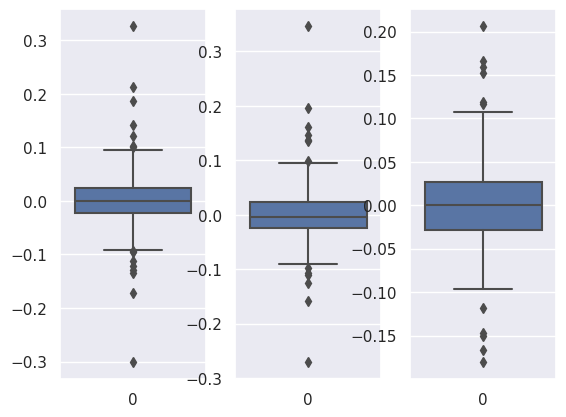

In [ ]:
# Box Plot

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3)

#create boxplot in each subplot
sns.boxplot(data=pca_df['PC1'], ax=axes[0])
sns.boxplot(data=pca_df['PC2'], ax=axes[1])
sns.boxplot(data=pca_df['PC3'], ax=axes[2])


### MaxAbsScaler normalization

In [ ]:
scaler = MaxAbsScaler()
x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test_small)

# Restrict all the values to be between 0 and 1
x_test_norm = np.clip(x_test_norm,0,1)


In [ ]:
pca = PCA(n_components = 32)

xs_train_norm = pca.fit_transform(x_train_norm)
xs_test_norm = pca.transform(x_test_norm)

In [ ]:
three_pc_norm = pd.DataFrame(
    data=pca.components_[0:3],
    index = ['PC1', 'PC2', 'PC3']
)

In [ ]:
three_pc_norm

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
PC1,0.024188,0.056195,0.037531,0.013884,-0.109444,-0.014466,-0.072613,0.040965,-0.117721,0.116251,...,-0.006096,0.032382,0.005035,-0.085012,-0.015312,0.021536,-0.008675,-0.020402,-0.003547,-0.002765
PC2,0.000420,0.083452,0.119313,-0.104092,0.167000,-0.124731,0.058960,-0.048229,-0.160397,-0.031374,...,-0.156116,-0.065680,-0.019719,-0.077326,-0.000914,0.024644,0.020783,0.008202,0.004571,-0.003491
PC3,-0.123593,-0.040699,-0.073086,0.014512,0.088001,0.059851,-0.071889,0.019576,0.117078,-0.343738,...,-0.079501,0.091471,0.022867,0.005548,-0.023724,-0.019626,-0.016679,0.010794,0.012590,-0.003202


In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.04667584 0.04370644 0.038514   0.03810517 0.03644829 0.03399039
 0.03291459 0.03232812 0.03079872 0.02836721 0.02774176 0.02559811
 0.02475009 0.02444303 0.02398773 0.02280793 0.02158439 0.02110549
 0.02043725 0.0198008  0.01908729 0.0179154  0.01718435 0.01674891
 0.01561015 0.01516731 0.01468464 0.01395486 0.01385951 0.01316067
 0.01292767 0.01250232]


In [ ]:
pca_norm_df = pd.DataFrame(
    data = xs_train_norm[:,0:3],
    columns = ['PC1', 'PC2', 'PC3']
)
pca_norm_df = pd.concat([pca_norm_df, pd.DataFrame(y_train, columns =['target'])[['target']]], axis=1)

In [ ]:
pca_norm_df

,PC1,PC2,PC3,target
0,-0.128141,-0.391311,-0.041418,0.0
1,-0.043548,0.094400,0.170526,0.0
2,0.180909,0.189010,0.086033,0.0
3,-0.198316,-0.271490,-0.151484,0.0
4,1.186498,1.642871,-0.648775,0.0
...,...,...,...,...
195,-0.028142,0.488250,-0.709229,1.0
196,0.580187,-0.000676,-0.809034,1.0
197,0.176704,0.513842,-0.930971,1.0
198,-0.520711,0.679900,-0.256616,1.0


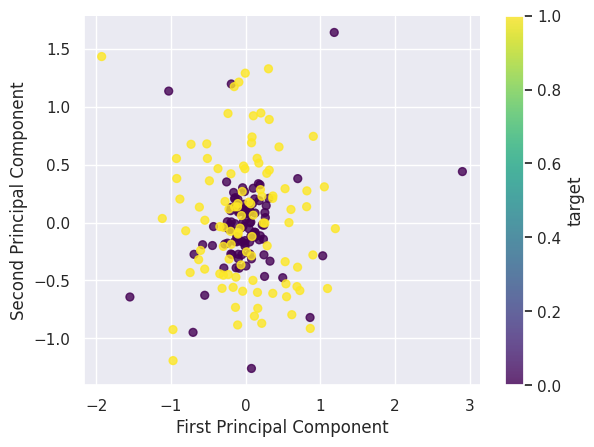

In [ ]:
pca_norm_df.plot(kind='scatter', x='PC1', y='PC2', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

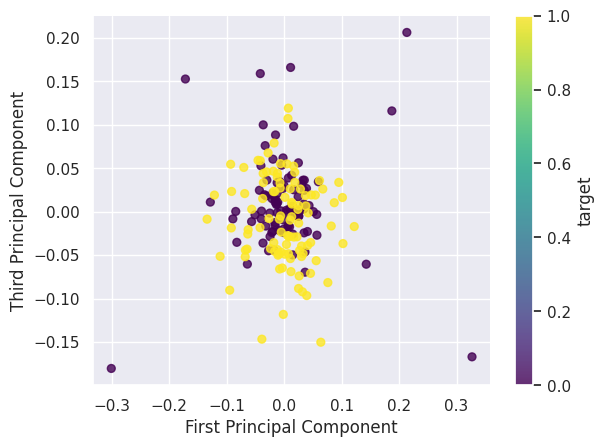

In [ ]:
pca_df.plot(kind='scatter', x='PC1', y='PC3', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('First Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

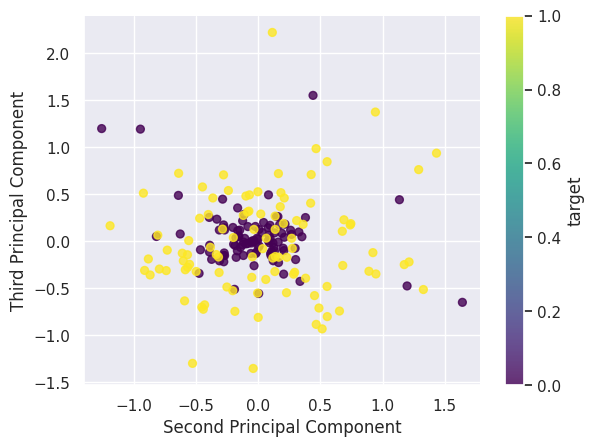

In [ ]:
pca_norm_df.plot(kind='scatter', x='PC2', y='PC3', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('Second Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

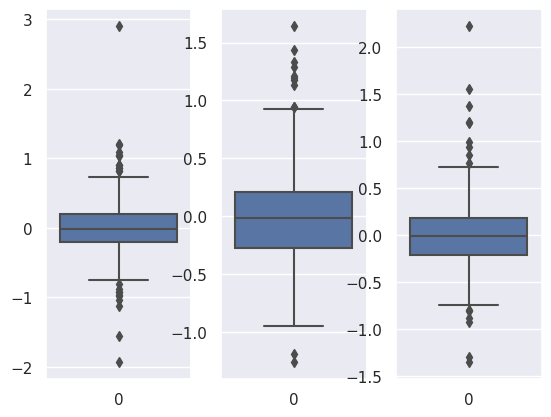

In [ ]:
# Box Plot

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3)

#create boxplot in each subplot
sns.boxplot(data=pca_norm_df['PC1'], ax=axes[0])
sns.boxplot(data=pca_norm_df['PC2'], ax=axes[1])
sns.boxplot(data=pca_norm_df['PC3'], ax=axes[2])


## 2. Quantum Support Vector Machines

In [ ]:
def detailed_accuracy(y_pred, size):
  test_size=size
  pred_split=np.array_split(y_test_pred,3)
  y_sep_pred=pred_split[0]
  y_ppt_pred=pred_split[1]
  y_nppt_pred=pred_split[2]

  score_sep = accuracy_score(y_sep_pred, np.full(test_size, 0))
  score_ppt= accuracy_score(y_ppt_pred, np.full(test_size,1))
  score_nppt= accuracy_score(y_nppt_pred, np.full(test_size,1))

  print("SEP accuracy: ", score_sep)
  print("PPT accuracy: ", score_ppt)
  print("NPPT accuracy: ", score_nppt)

In [ ]:
def save_model(model, filename):
  dir="/content/drive/MyDrive/tfg/"+filename
  joblib.dump(model, dir)
  print("Model saved")

In [ ]:
def load_model(model, filename):
  dir="/content/drive/MyDrive/tfg/"+filename
  return joblib.load(dir)

In [ ]:
# Amplitude encoding of 64 variables using 5 qubits (can encode up to 32 inputs)

# Number of qubits of the system
nqubits = 5
# We define a device
dev = qml.device("lightning.qubit", wires = nqubits)

# We define de circuit of our kernel. We use AmplitudeEmbedding which returns an
# operation equivalent to amplitude encoding of the first argument
@qml.qnode(dev)
def kernel_circ(a,b):
    qml.AmplitudeEmbedding(a, wires=range(nqubits), pad_with=0, normalize=True)
    # Computes the adjoint (or inverse) of the amplitude encoding of b
    qml.adjoint(qml.AmplitudeEmbedding(b, wires=range(nqubits), pad_with=0, normalize=True))    # We return an array with the probabilities fo measuring each possible state in the
    # computational basis
    return qml.probs(wires=range(nqubits))

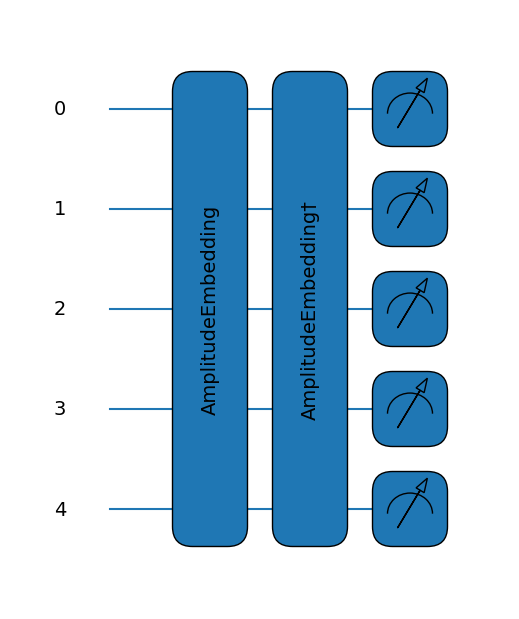

In [ ]:
fig, ax = qml.draw_mpl(kernel_circ)([1],[1])
fig.show()

In [ ]:
def qkernel(A, B):
  return np.array([[kernel_circ(a,b)[0] for b in B] for a in A])

Now, we will activate GPU acceleration and check it

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Nov 13 14:59:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
svm = SVC(kernel = qkernel).fit(xs_train, y_train)

In [ ]:
y_train_pred=svm.predict(xs_train)

In [ ]:
tr_acc=accuracy_score(y_train_pred, y_train)
print("Train accuracy: ", tr_acc)

Train accuracy:  1.0


In [ ]:
y_test_pred=svm.predict(xs_test)

In [ ]:
test_acc=accuracy_score(y_test_pred, y_test_small)
print("Test accuracy: ", test_acc)

Test accuracy:  0.9666666666666667


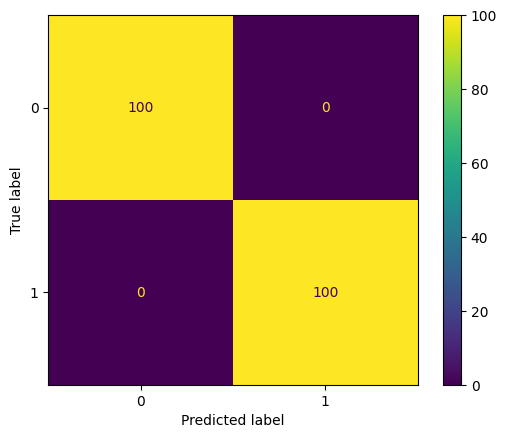

In [ ]:
# Train confussion matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

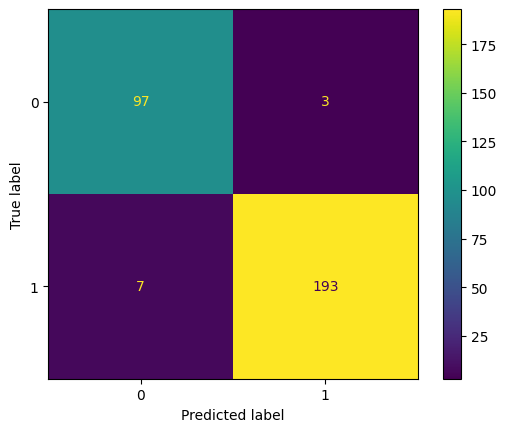

In [ ]:
# Test confussion matrix
cm = confusion_matrix(y_test_small, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Test accuracy per type
detailed_accuracy(y_test_pred, 100)

SEP accuracy:  0.97
PPT accuracy:  0.95
NPPT accuracy:  0.98


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
model_type = SVC()
model_params = [{'kernel': [qkernel]}]
model = GridSearchCV(model_type, model_params, cv=StratifiedKFold(shuffle=True)).fit(xs_train, y_train)
print('Training results :')
print(model.best_params_)
print(model.best_score_)

Training results :
{'kernel': <function qkernel at 0x788877ed0dc0>}
0.9650000000000001


Using a Support Vector Machine with a quantum kernel induced by Amplitude encoding with
- 5 qubits
- 32 attributes
We have run with GPU acceleration the training in 12 minutes and predictions on the training set in 13 minutes. We have obtained an accuracy of 1.0 on the training set

Then, we have performed the predictions on the test set, which took 19 minutes. We have obtained an accuracy of 0.9667 on the test set.

With the predictions of the test set, we have also studied the accuracy on the predictions of each type of data: Separable, PPT-entangled and NPPT-entangled.
- Accuracy of 0.97 on the separable data samples
- Accuracy of 0.95 on the PPT entangled data samples
- Accuracy of 0.98 on the NPPT entangled data samples.

Therefore, we can conclude that this QSVM performs great and is able to correctly clasify separable and entangled data, specially PPT entangled data (which is the "hardest" to distinguish from separable) with a great accuracy.

Above we can see the confussion matrices for classification of the training set and the test set.

Finally, we have run trained this model using GridSearchCV (just with this model exact configuration) with five fold cross validation using. This took more than 50 minutes to execute. We obtained 0.965 as best accuracy. We need to discard using GridSeachCV to perform an exhaustive search over differnet parameter values for a model due to the long executing time obtained just for one configuration and because the different configurations of a QSVM are not externally parametrised, but defined in the quantum circuit

Next we will train and predict this same model configuration on our normalized dataset to check if there is any difference in the accuracy

In [ ]:
svm = SVC(kernel = qkernel).fit(xs_train_norm, y_train)

In [ ]:
y_train_pred=svm.predict(xs_train_norm)

In [ ]:
tr_acc=accuracy_score(y_train_pred, y_train)
print("Train accuracy: ", tr_acc)

Train accuracy:  1.0


In [ ]:
y_test_pred=svm.predict(xs_test_norm)

In [ ]:
test_acc=accuracy_score(y_test_pred, y_test_small)
print("Test accuracy: ", test_acc)

Test accuracy:  0.8966666666666666


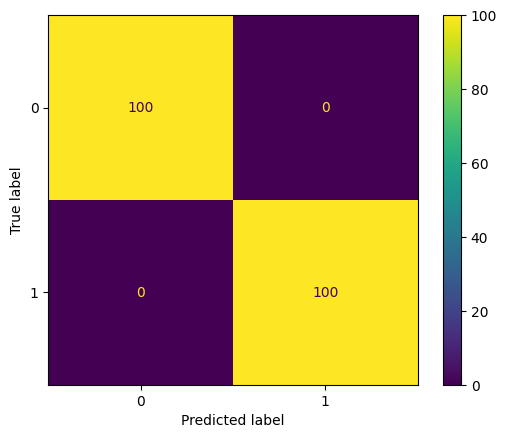

In [ ]:
# Train confussion matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

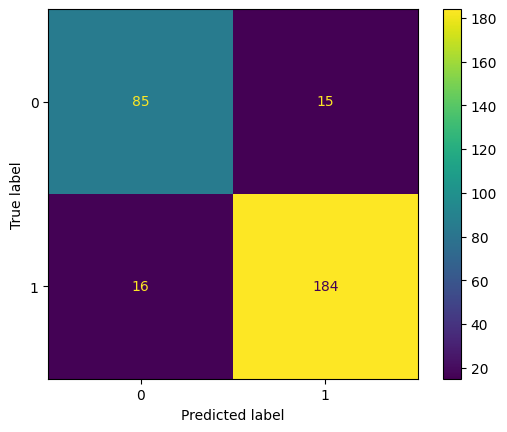

In [ ]:
# Test confussion matrix
cm = confusion_matrix(y_test_small, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Test accuracy per type
detailed_accuracy(y_test_pred, 100)

SEP accuracy:  0.85
PPT accuracy:  0.94
NPPT accuracy:  0.9


The use of normalized data (with MaxAbsScaler) does not improve the model neither the execution time. Indeed, the accuracy worsens from 0.9667 to 0.8967. From now on, we will continue working only with the not normalized dataset

## 3. Quantum Neural Networks

We will try different configurations of neural networks based on the promising results obtained in the first phase of trials. However, we cannot use GridSeachCV to select the best model because the parameters and changes that we apply in each configuration are performed in the quantum neural network circuit definition. We have created the function *fivefoldCV_qnn(circuit)* to perform five fold cross validation for every QNN circuit that we will test. The five fold cross validation code is inspired by https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md


In [ ]:
# We set a seed for the packages so the results are reproducible
seed=4321
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# pennylane works with doubles and tensorflow works with floats.
# We ask tensorflow to work with doubles

tf.keras.backend.set_floatx('float64')

In [ ]:
def fivefoldCV_qnn(circuit, x, y):
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=5, shuffle=True)
  acc_per_fold = []
  loss_per_fold = []

  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(x, y):

    # Define the model architecture
    method= "adjoint"
    tf.random.set_seed(seed)
    qnn = qml.QNode(circuit, dev, interface="tf", diff_method=method)
    nweights = 3*nreps*nqubits
    weights={"theta": nweights}
    # Keras layer containing qnn
    qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)
    # keras model
    model = tf.keras.models.Sequential([qlayer])
    # we choose adam optimizer with a learning rate of 0.005
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)


    # binary cross entropy loss, because we are training a binary classifier
    model.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Training our model
    history = model.fit(x[train], y[train], epochs = 50, shuffle = True,
                      validation_data = None, batch_size = 20, verbose=1)

    # Generate generalization metrics
    score = model.evaluate(x[test], y[test], verbose=0)
    # Check accuracy
    y_test_pred=model.predict(x[test]) >= 0.5
    test_acc = accuracy_score(y_test_pred, y[test])

    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {score}; accuracy of {test_acc}')
    loss_per_fold.append(score)
    acc_per_fold.append(test_acc)


    # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
  print('------------------------------------------------------------------------')
  print('Score per fold')
  for i in range(0, len(loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
  print('------------------------------------------------------------------------')
  print('Average scores for all folds:')
  print(f'> Loss: {np.mean(loss_per_fold)}')
  print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
  print('------------------------------------------------------------------------')

In [ ]:
def performance(y_train_pred, y_train, y_test_pred, y_test):
  tr_acc = accuracy_score(y_train_pred, y_train)
  test_acc = accuracy_score(y_test_pred, y_test_small)

  tr_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)

  print("Train accuracy: ", tr_acc)
  print("Train F-1 score: ", tr_f1)

  print("\nTest accuracy: ", test_acc)
  print("Test F-1 score: ", test_f1)

  # Test accuracy per type
  print("\nTest accuracy broken down per type")
  detailed_accuracy(y_test_pred, 100)

  print("\n")
  # Train confusion matrix
  cm = confusion_matrix(y_train, y_train_pred)
  cm_display = ConfusionMatrixDisplay(cm).plot()
  cm_display.ax_.set_title("Train confusion matrix")

  # Test confusion matrix
  cm = confusion_matrix(y_test, y_test_pred)
  cm_display = ConfusionMatrixDisplay(cm).plot()
  cm_display.ax_.set_title("Test confusion matrix")


### Twolocal variational form

In [ ]:
# Hermitian matrix
state_0 = [[1], [0]]
M = state_0 * np.conj(state_0).T

In [ ]:
# Two local variational form
def TwoLocal(nqubits, theta, reps=1):
  for r in range(reps):
    for i in range(nqubits):
      qml.RY(theta[r*nqubits+i], wires=i)
    for i in range(nqubits-1):
      qml.CNOT(wires=[i,i+1])

  for i in range(nqubits):
    qml.RY(theta[reps*nqubits+i], wires=i)

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=10

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
# Model 1 five fold cross validation
fivefoldCV_qnn(qnn_circuit,xs_train, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 13s 1s/step - loss: 0.9823
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 0.9532
Epoch 3/50
8/8 [==============================] - 15s 2s/step - loss: 0.9237
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 0.8864
Epoch 5/50
8/8 [==============================] - 14s 2s/step - loss: 0.8467
Epoch 6/50
8/8 [==============================] - 15s 2s/step - loss: 0.8062
Epoch 7/50
8/8 [==============================] - 12s 2s/step - loss: 0.7675
Epoch 8/50
8/8 [==============================] - 12s 1s/step - loss: 0.7324
Epoch 9/50
8/8 [==============================] - 15s 2s/step - loss: 0.7026
Epoch 10/50
8/8 [==============================] - 15s 2s/step - loss: 0.6765
Epoch 11/50
8/8 [==============================] - 12s 2s/step - loss: 0.6564
Epoch 12/50
8/8 [==============================] - 13s 

Since the performance we have obtained in the five fold cross validation process looks promising, we will finalise it by re-training our model with all the training data to make predictions on the test set.

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_1 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_1.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

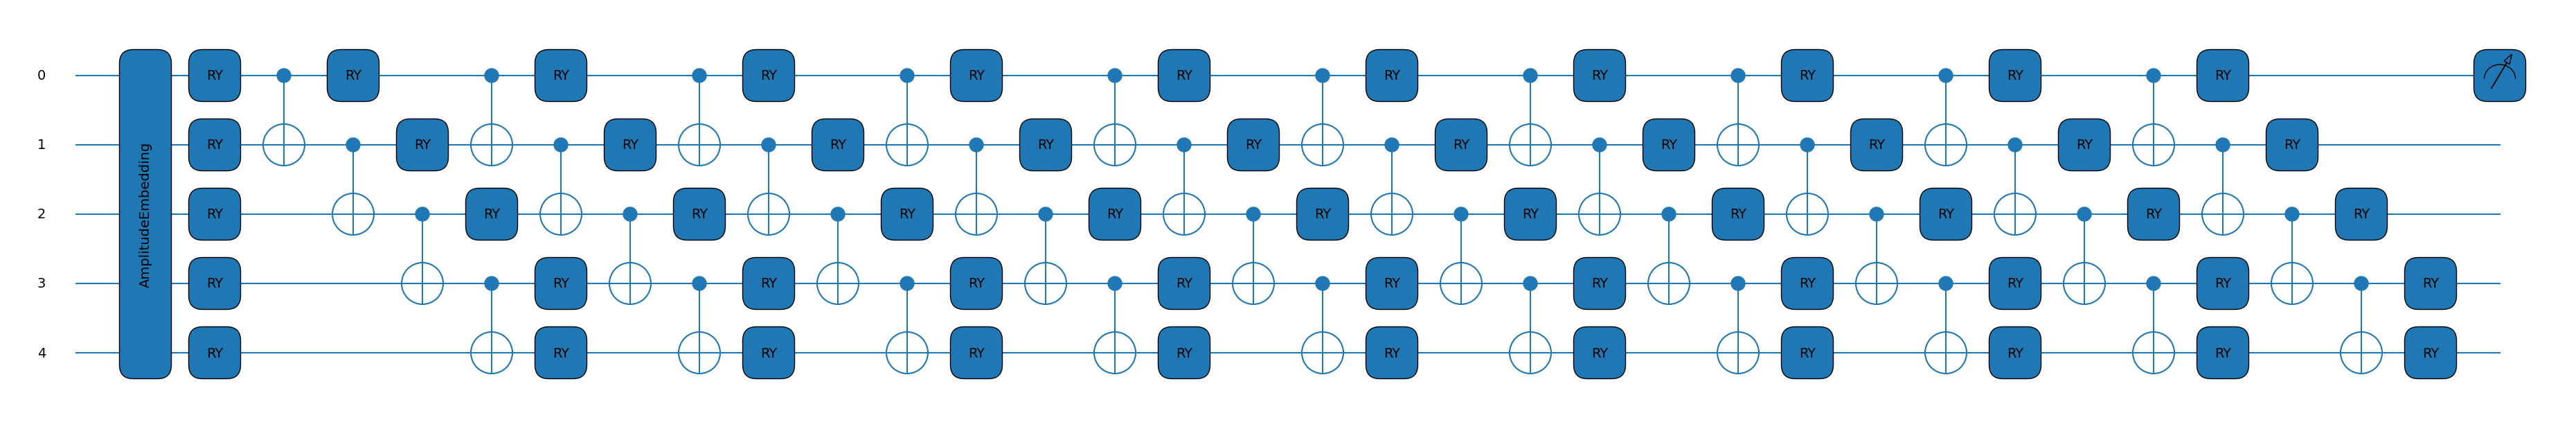

In [ ]:
nweights = 3*nreps*nqubits
theta=np.random.rand(nweights)

fig, ax = qml.draw_mpl(qnn)(xs_train,theta)
fig.show()

In [ ]:
history = model_1.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 21s 2s/step - loss: 0.9890
Epoch 2/50
10/10 [==============================] - 19s 2s/step - loss: 0.9460
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.8988
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.8421
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.7913
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 0.7408
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 0.7074
Epoch 8/50
10/10 [==============================] - 16s 1s/step - loss: 0.6749
Epoch 9/50
10/10 [==============================] - 18s 2s/step - loss: 0.6553
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.6361
Epoch 11/50
10/10 [==============================] - 18s 2s/step - loss: 0.6231
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.6129
Epoch 13/50
10/10 [==============================

In [ ]:
# Compute predictions
y_train_pred=model_1.predict(xs_train) >= 0.5
y_test_pred=model_1.predict(xs_test) >= 0.5

10/10 [==============================] - 10s 960ms/step


Train accuracy:  0.845
Train F-1 score:  0.824858757062147

Test accuracy:  0.6333333333333333
Test F-1 score:  0.6283783783783784

Test accuracy broken down per type
SEP accuracy:  0.97
PPT accuracy:  0.45
NPPT accuracy:  0.48




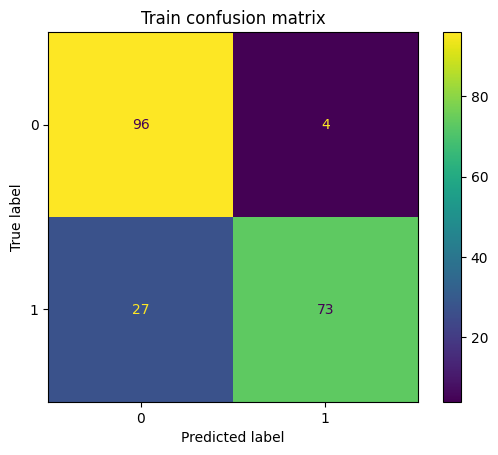

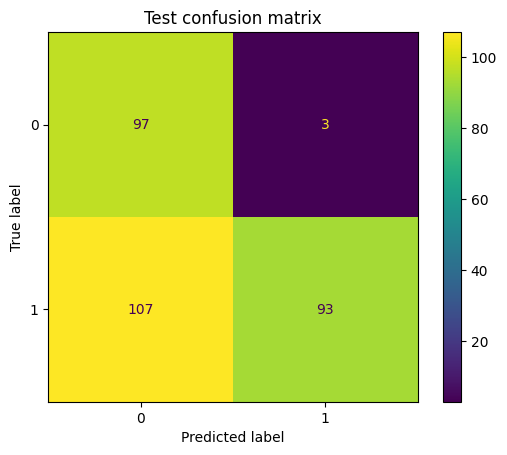

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 17 min

#### Normalized data

In [ ]:
# Model 2 five fold cross validation
fivefoldCV_qnn(qnn_circuit,xs_train_norm, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 15s 1s/step - loss: 0.7501
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 0.7348
Epoch 3/50
8/8 [==============================] - 15s 2s/step - loss: 0.7185
Epoch 4/50
8/8 [==============================] - 11s 1s/step - loss: 0.7016
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 0.6849
Epoch 6/50
8/8 [==============================] - 15s 2s/step - loss: 0.6691
Epoch 7/50
8/8 [==============================] - 15s 2s/step - loss: 0.6537
Epoch 8/50
8/8 [==============================] - 9s 1s/step - loss: 0.6402
Epoch 9/50
8/8 [==============================] - 15s 2s/step - loss: 0.6270
Epoch 10/50
8/8 [==============================] - 14s 2s/step - loss: 0.6137
Epoch 11/50
8/8 [==============================] - 10s 1s/step - loss: 0.6023
Epoch 12/50
8/8 [==============================] - 15s 

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_2 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_2.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
history = model_2.fit(xs_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 19s 2s/step - loss: 0.7627
Epoch 2/50
10/10 [==============================] - 28s 3s/step - loss: 0.7409
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.7189
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.6929
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.6716
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.6472
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.6278
Epoch 8/50
10/10 [==============================] - 18s 2s/step - loss: 0.6084
Epoch 9/50
10/10 [==============================] - 17s 2s/step - loss: 0.5944
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.5770
Epoch 11/50
10/10 [==============================] - 18s 2s/step - loss: 0.5658
Epoch 12/50
10/10 [==============================] - 19s 2s/step - loss: 0.5542
Epoch 13/50
10/10 [==============================

In [ ]:
# Check accuracy
y_train_pred=model_2.predict(xs_train_norm) >= 0.5
y_test_pred=model_2.predict(xs_test_norm) >= 0.5

10/10 [==============================] - 11s 1s/step


Train accuracy:  0.87
Train F-1 score:  0.8571428571428571

Test accuracy:  0.6333333333333333
Test F-1 score:  0.6540880503144655

Test accuracy broken down per type
SEP accuracy:  0.86
PPT accuracy:  0.49
NPPT accuracy:  0.55




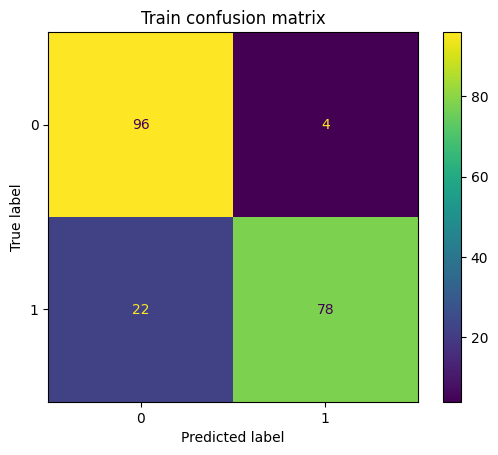

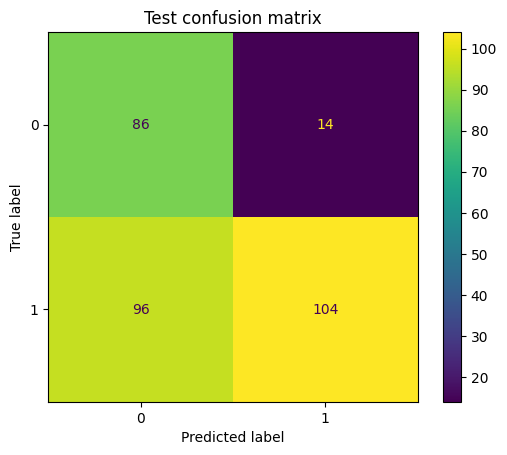

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 15 min

#### 20 repetitions

Next, we will try again with this variational form seeking for better results by increasing the number of repetitions. We need to improve our QNN to detect entanglement better, because in both previous experiments there is a high number of false negatives.


In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=20

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_3 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_3.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

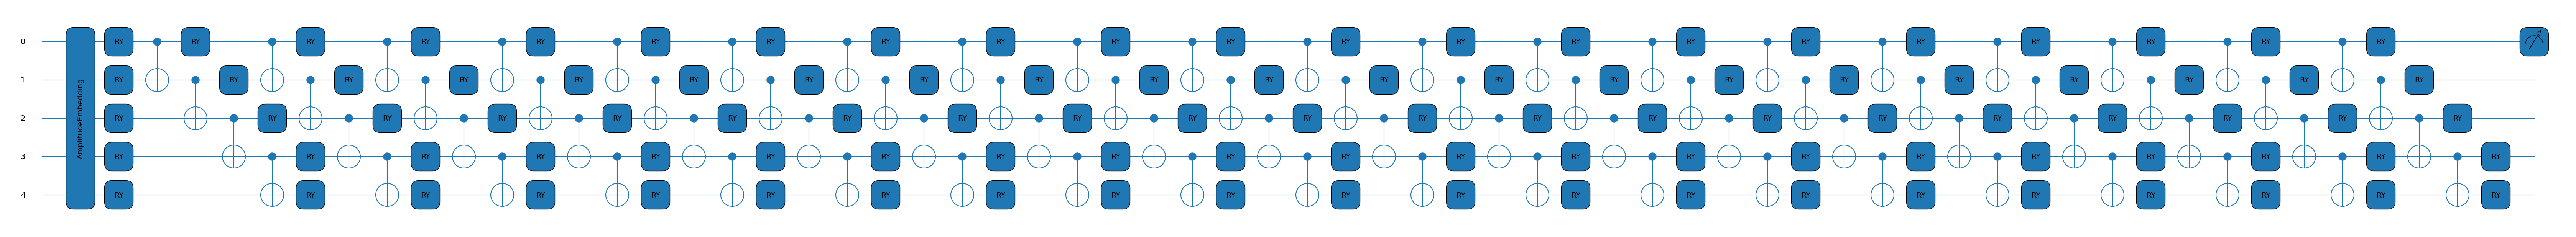

In [ ]:
nweights = 3*nreps*nqubits
theta=np.random.rand(nweights)

fig, ax = qml.draw_mpl(qnn)(xs_train,theta)
fig.show()

In [ ]:
# Training our model
history = model_3.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 29s 3s/step - loss: 0.9886
Epoch 2/50
10/10 [==============================] - 25s 3s/step - loss: 0.9227
Epoch 3/50
10/10 [==============================] - 31s 3s/step - loss: 0.8437
Epoch 4/50
10/10 [==============================] - 27s 3s/step - loss: 0.7698
Epoch 5/50
10/10 [==============================] - 39s 4s/step - loss: 0.7149
Epoch 6/50
10/10 [==============================] - 39s 4s/step - loss: 0.6552
Epoch 7/50
10/10 [==============================] - 38s 4s/step - loss: 0.6127
Epoch 8/50
10/10 [==============================] - 40s 4s/step - loss: 0.5727
Epoch 9/50
10/10 [==============================] - 35s 4s/step - loss: 0.5493
Epoch 10/50
10/10 [==============================] - 29s 3s/step - loss: 0.5344
Epoch 11/50
10/10 [==============================] - 27s 3s/step - loss: 0.5239
Epoch 12/50
10/10 [==============================] - 27s 2s/step - loss: 0.5173
Epoch 13/50
10/10 [==============================

In [ ]:
# Check accuracy
y_train_pred=model_3.predict(xs_train) >= 0.5
y_test_pred=model_3.predict(xs_test) >= 0.5

10/10 [==============================] - 19s 2s/step


Train accuracy:  0.885
Train F-1 score:  0.8700564971751412

Test accuracy:  0.64
Test F-1 score:  0.6351351351351351

Test accuracy broken down per type
SEP accuracy:  0.98
PPT accuracy:  0.44
NPPT accuracy:  0.5




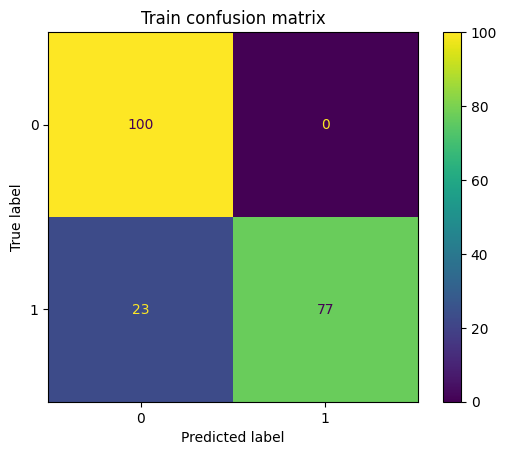

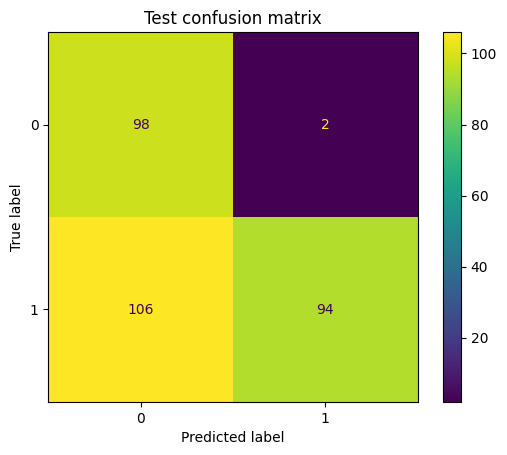

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 24 min

We have tried with 15 and 20 repetitions and while it is true that the increase in the numer of repetitions slightly increases the accuracy, the tradeoff performance-executing time is not worth. The accuracy on the test set, specially detecting entanglement is really poor and the training time doubles, making it really costly to perform five fold cross validation.

### StrongEntanglingLayers

In [ ]:
nqubits=5
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 8
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))


In [ ]:
# Model 4 five fold cross validation
fivefoldCV_qnn(qnn_circuit_strong,xs_train, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 46s 5s/step - loss: 0.8029
Epoch 2/50
8/8 [==============================] - 29s 4s/step - loss: 0.7676
Epoch 3/50
8/8 [==============================] - 34s 4s/step - loss: 0.7324
Epoch 4/50
8/8 [==============================] - 34s 4s/step - loss: 0.6952
Epoch 5/50
8/8 [==============================] - 30s 3s/step - loss: 0.6590
Epoch 6/50
8/8 [==============================] - 32s 4s/step - loss: 0.6278
Epoch 7/50
8/8 [==============================] - 28s 3s/step - loss: 0.5998
Epoch 8/50
8/8 [==============================] - 31s 4s/step - loss: 0.5775
Epoch 9/50
8/8 [==============================] - 29s 4s/step - loss: 0.5595
Epoch 10/50
8/8 [==============================] - 32s 4s/step - loss: 0.5455
Epoch 11/50
8/8 [==============================] - 26s 3s/step - loss: 0.5342
Epoch 12/50
8/8 [==============================] - 31s

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_4 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_4.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

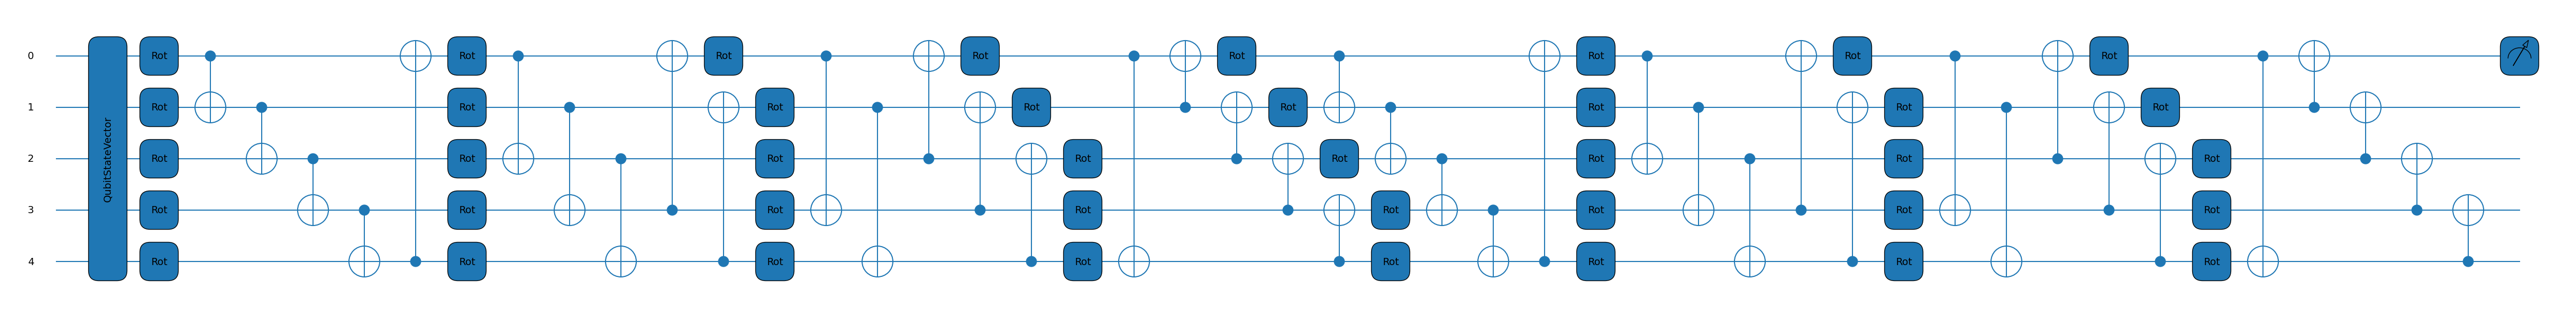

In [ ]:
nweights = 3*nreps*nqubits
theta=np.random.rand(nweights)

fig, ax = qml.draw_mpl(qnn,expansion_strategy="device")(xs_train,theta)
fig.show()

In [ ]:
# Training our model
history = model_4.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 36s 4s/step - loss: 0.7253
Epoch 2/50
10/10 [==============================] - 28s 3s/step - loss: 0.7125
Epoch 3/50
10/10 [==============================] - 33s 3s/step - loss: 0.6988
Epoch 4/50
10/10 [==============================] - 30s 3s/step - loss: 0.6864
Epoch 5/50
10/10 [==============================] - 31s 3s/step - loss: 0.6749
Epoch 6/50
10/10 [==============================] - 34s 3s/step - loss: 0.6607
Epoch 7/50
10/10 [==============================] - 30s 3s/step - loss: 0.6472
Epoch 8/50
10/10 [==============================] - 31s 3s/step - loss: 0.6301
Epoch 9/50
10/10 [==============================] - 32s 3s/step - loss: 0.6155
Epoch 10/50
10/10 [==============================] - 27s 3s/step - loss: 0.6013
Epoch 11/50
10/10 [==============================] - 33s 3s/step - loss: 0.5893
Epoch 12/50
10/10 [==============================] - 31s 3s/step - loss: 0.5778
Epoch 13/50
10/10 [==============================

In [ ]:
# Check accuracy
y_train_pred=model_4.predict(xs_train) >= 0.5
y_test_pred=model_4.predict(xs_test) >= 0.5

10/10 [==============================] - 20s 2s/step


Train accuracy:  0.885
Train F-1 score:  0.8700564971751412

Test accuracy:  0.64
Test F-1 score:  0.64

Test accuracy broken down per type
SEP accuracy:  0.96
PPT accuracy:  0.46
NPPT accuracy:  0.5




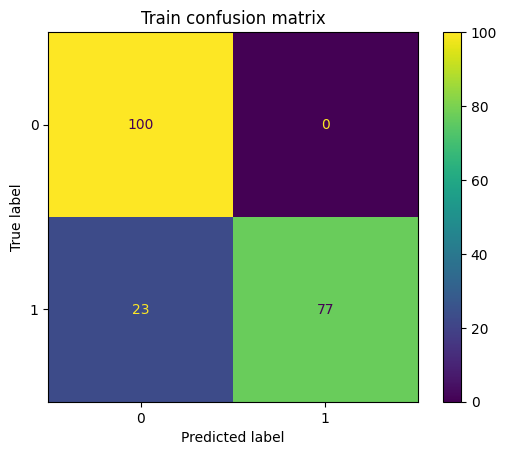

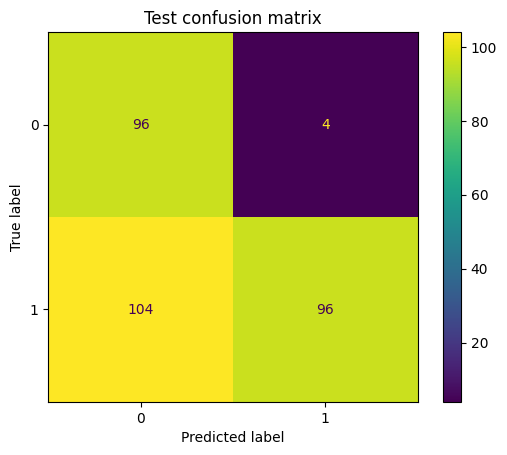

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training time full dataset 26 min

StrongEntanglingLayers variational form training time increases as the numper of repetitions increases. We have observed in previous tests that the increase in the number of repetitions improves the performance of the QNN. For 8 repetitions, it took 2h for training with five fold cross validation and 26 minutes for training with the entire training set. Therefore, we cannot try with a higher number of repetitions because of the high training time. With this model we have still obtained a poor entanglement detection.

#### Normalized data

In [ ]:
# Model 4n five fold cross validation (normalized data)
fivefoldCV_qnn(qnn_circuit_strong,xs_train_norm, y_train)

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_4n = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_4n.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model_4n.fit(xs_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 33s 3s/step - loss: 0.7903
Epoch 2/50
10/10 [==============================] - 34s 4s/step - loss: 0.7656
Epoch 3/50
10/10 [==============================] - 28s 3s/step - loss: 0.7430
Epoch 4/50
10/10 [==============================] - 33s 3s/step - loss: 0.7183
Epoch 5/50
10/10 [==============================] - 34s 3s/step - loss: 0.6945
Epoch 6/50
10/10 [==============================] - 28s 3s/step - loss: 0.6689
Epoch 7/50
10/10 [==============================] - 32s 3s/step - loss: 0.6452
Epoch 8/50
10/10 [==============================] - 34s 4s/step - loss: 0.6209
Epoch 9/50
10/10 [==============================] - 28s 3s/step - loss: 0.6011
Epoch 10/50
10/10 [==============================] - 33s 3s/step - loss: 0.5816
Epoch 11/50
10/10 [==============================] - 30s 3s/step - loss: 0.5670
Epoch 12/50
10/10 [==============================] - 30s 3s/step - loss: 0.5532
Epoch 13/50
10/10 [==============================

In [ ]:
# Check accuracy
y_train_pred=model_4n.predict(xs_train_norm) >= 0.5
y_test_pred=model_4n.predict(xs_test_norm) >= 0.5

10/10 [==============================] - 20s 2s/step


Train accuracy:  0.915
Train F-1 score:  0.9081081081081082

Test accuracy:  0.56
Test F-1 score:  0.5384615384615384

Test accuracy broken down per type
SEP accuracy:  0.91
PPT accuracy:  0.42
NPPT accuracy:  0.35




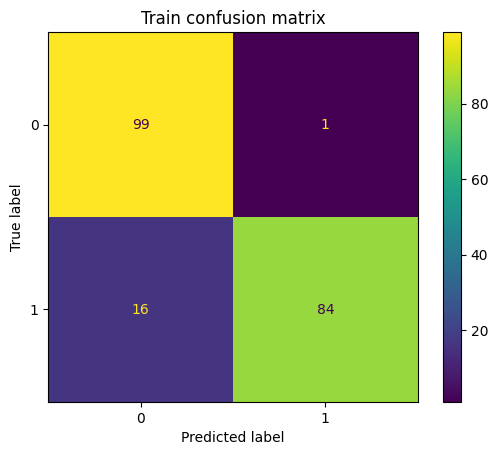

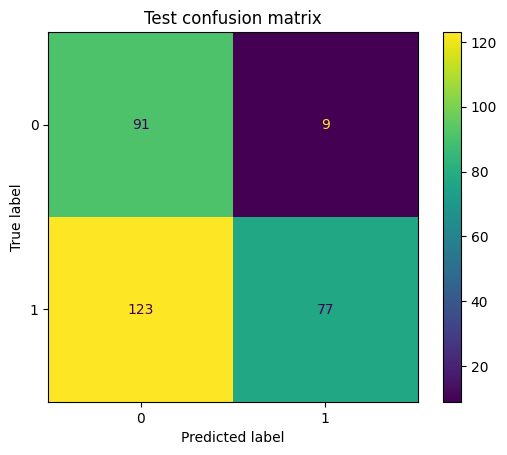

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 26 min

### BasicEntanglerLayers

It uses by default the single qubit X rotation gate

In [ ]:
nqubits=5
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 10


def qnn_circuit_basic(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  qml.BasicEntanglerLayers(weights=theta, wires=range(nqubits))
  return qml.expval(qml.Hermitian(M, wires = [0]))

n_layers = 6
weights = {"theta": (nreps, nqubits)}

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit_basic, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_5 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_5.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

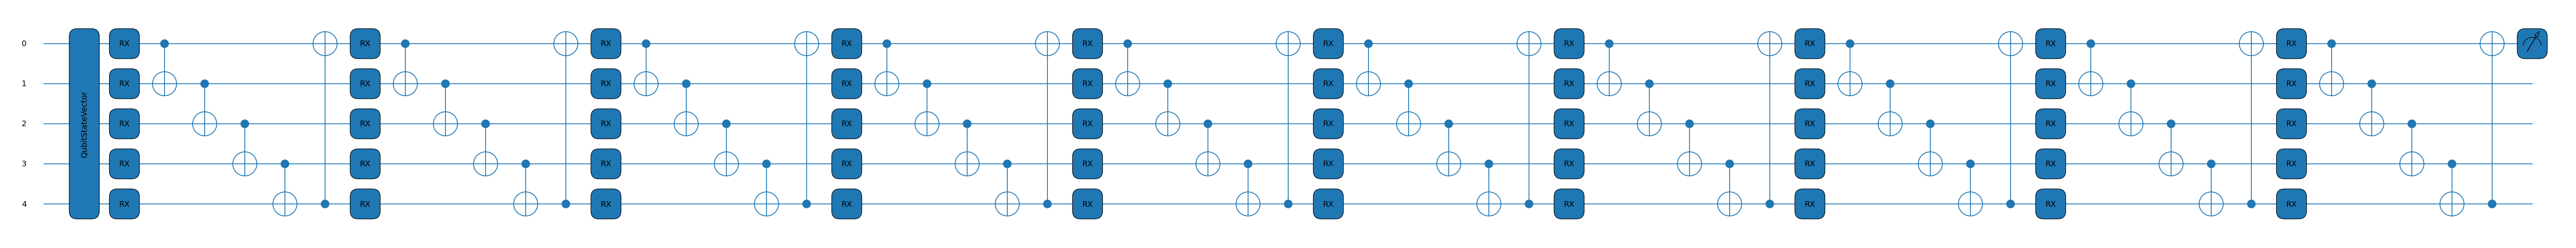

In [ ]:
theta=np.random.rand(nreps,nqubits)

fig, ax = qml.draw_mpl(qnn,expansion_strategy="device")(xs_train,theta)
fig.show()

In [ ]:
# Training our model
history = model_5.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 23s 2s/step - loss: 0.6810
Epoch 2/50
10/10 [==============================] - 27s 3s/step - loss: 0.6728
Epoch 3/50
10/10 [==============================] - 38s 4s/step - loss: 0.6678
Epoch 4/50
10/10 [==============================] - 22s 2s/step - loss: 0.6643
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.6610
Epoch 6/50
10/10 [==============================] - 24s 3s/step - loss: 0.6591
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.6571
Epoch 8/50
10/10 [==============================] - 17s 2s/step - loss: 0.6561
Epoch 9/50
10/10 [==============================] - 17s 2s/step - loss: 0.6542
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.6530
Epoch 11/50
10/10 [==============================] - 17s 2s/step - loss: 0.6523
Epoch 12/50
10/10 [==============================] - 19s 2s/step - loss: 0.6522
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_5.predict(xs_train) >= 0.5
y_test_pred=model_5.predict(xs_test) >= 0.5

10/10 [==============================] - 10s 938ms/step


Train accuracy:  0.68
Train F-1 score:  0.6666666666666666

Test accuracy:  0.5266666666666666
Test F-1 score:  0.5617283950617283

Test accuracy broken down per type
SEP accuracy:  0.67
PPT accuracy:  0.48
NPPT accuracy:  0.43




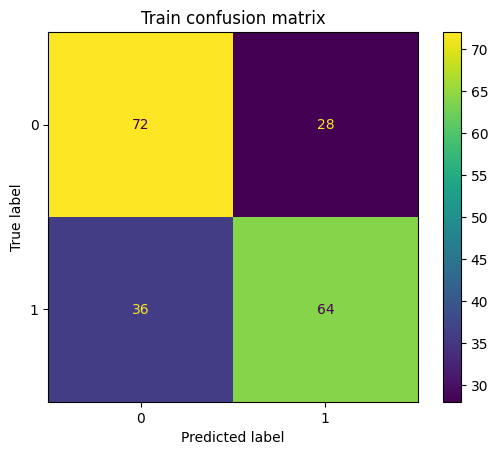

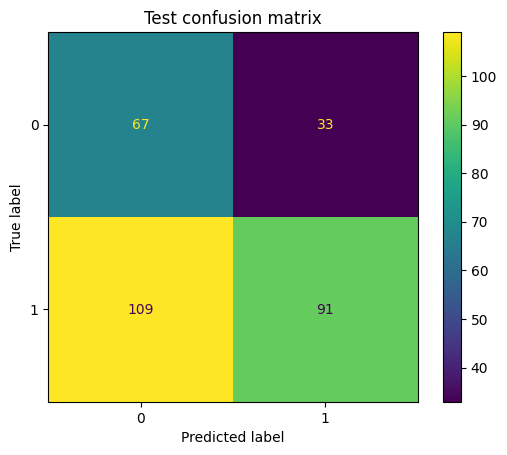

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 20 min

We cannot apply our five fold cross validation function because of the shape of the weights of this variational form. Anyway, this is the worst accuracy

### Hybrid model

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit_basic, dev, interface="tf", diff_method=method)

clayer1 = tf.keras.layers.Input(32)
clayer2 = tf.keras.layers.Dense(32, activation="sigmoid")

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_6 = tf.keras.models.Sequential([clayer1, clayer2, qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_6.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model_6.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50


 1/10 [==>...........................] - ETA: 1:33 - loss: 0.6914

 2/10 [=====>........................] - ETA: 15s - loss: 0.6921 

 3/10 [========>.....................] - ETA: 10s - loss: 0.6926

 4/10 [===========>..................] - ETA: 9s - loss: 0.6925 

 5/10 [==============>...............] - ETA: 7s - loss: 0.6925

 6/10 [=================>............] - ETA: 5s - loss: 0.6930

 7/10 [====================>.........] - ETA: 3s - loss: 0.6933

 8/10 [=======================>......] - ETA: 2s - loss: 0.6933

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 26s 2s/step - loss: 0.6932
Epoch 2/50


 1/10 [==>...........................] - ETA: 32s - loss: 0.6920

 2/10 [=====>........................] - ETA: 8s - loss: 0.6923 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6931

 4/10 [===========>..................] - ETA: 6s - loss: 0.6929

 5/10 [==============>...............] - ETA: 5s - loss: 0.6928

 6/10 [=================>............] - ETA: 4s - loss: 0.6929

 7/10 [====================>.........] - ETA: 3s - loss: 0.6930

 8/10 [=======================>......] - ETA: 2s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 16s 1s/step - loss: 0.6931
Epoch 3/50


 1/10 [==>...........................] - ETA: 24s - loss: 0.6936

 2/10 [=====>........................] - ETA: 30s - loss: 0.6929

 3/10 [========>.....................] - ETA: 16s - loss: 0.6943

 4/10 [===========>..................] - ETA: 11s - loss: 0.6942

 5/10 [==============>...............] - ETA: 9s - loss: 0.6936 

 6/10 [=================>............] - ETA: 6s - loss: 0.6934

 7/10 [====================>.........] - ETA: 4s - loss: 0.6935

 8/10 [=======================>......] - ETA: 3s - loss: 0.6934

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 15s 1s/step - loss: 0.6931
Epoch 4/50


 1/10 [==>...........................] - ETA: 16s - loss: 0.6928

 2/10 [=====>........................] - ETA: 32s - loss: 0.6933

 3/10 [========>.....................] - ETA: 26s - loss: 0.6932

 4/10 [===========>..................] - ETA: 17s - loss: 0.6928

 5/10 [==============>...............] - ETA: 12s - loss: 0.6926

 6/10 [=================>............] - ETA: 8s - loss: 0.6922 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6924

 8/10 [=======================>......] - ETA: 3s - loss: 0.6927

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 5/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6952

 2/10 [=====>........................] - ETA: 15s - loss: 0.6944

 3/10 [========>.....................] - ETA: 16s - loss: 0.6938

 4/10 [===========>..................] - ETA: 14s - loss: 0.6936

 5/10 [==============>...............] - ETA: 12s - loss: 0.6932

 6/10 [=================>............] - ETA: 9s - loss: 0.6931 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6929

 8/10 [=======================>......] - ETA: 3s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 17s 2s/step - loss: 0.6931
Epoch 6/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6910

 2/10 [=====>........................] - ETA: 8s - loss: 0.6929

 3/10 [========>.....................] - ETA: 9s - loss: 0.6936

 4/10 [===========>..................] - ETA: 10s - loss: 0.6935

 5/10 [==============>...............] - ETA: 11s - loss: 0.6934

 6/10 [=================>............] - ETA: 9s - loss: 0.6933 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6932

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 7/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6953

 2/10 [=====>........................] - ETA: 8s - loss: 0.6940

 3/10 [========>.....................] - ETA: 7s - loss: 0.6938

 4/10 [===========>..................] - ETA: 6s - loss: 0.6929

 5/10 [==============>...............] - ETA: 7s - loss: 0.6928

 6/10 [=================>............] - ETA: 7s - loss: 0.6928

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6927

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 8/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6912

 2/10 [=====>........................] - ETA: 8s - loss: 0.6933 

 3/10 [========>.....................] - ETA: 8s - loss: 0.6942

 4/10 [===========>..................] - ETA: 7s - loss: 0.6931

 5/10 [==============>...............] - ETA: 6s - loss: 0.6928

 6/10 [=================>............] - ETA: 6s - loss: 0.6928

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 9/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6964

 2/10 [=====>........................] - ETA: 8s - loss: 0.6934

 3/10 [========>.....................] - ETA: 7s - loss: 0.6931

 4/10 [===========>..................] - ETA: 6s - loss: 0.6934

 5/10 [==============>...............] - ETA: 5s - loss: 0.6936

 6/10 [=================>............] - ETA: 4s - loss: 0.6937

 7/10 [====================>.........] - ETA: 5s - loss: 0.6937

 8/10 [=======================>......] - ETA: 4s - loss: 0.6937

 9/10 [==========================>...] - ETA: 1s - loss: 0.6934

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 10/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6929

 2/10 [=====>........................] - ETA: 8s - loss: 0.6940 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6930

 4/10 [===========>..................] - ETA: 6s - loss: 0.6929

 5/10 [==============>...............] - ETA: 5s - loss: 0.6930

 6/10 [=================>............] - ETA: 4s - loss: 0.6928

 7/10 [====================>.........] - ETA: 4s - loss: 0.6929

 8/10 [=======================>......] - ETA: 3s - loss: 0.6929

 9/10 [==========================>...] - ETA: 1s - loss: 0.6928

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 11/50


 1/10 [==>...........................] - ETA: 12s - loss: 0.6973

 2/10 [=====>........................] - ETA: 8s - loss: 0.6947 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6939

 4/10 [===========>..................] - ETA: 6s - loss: 0.6939

 5/10 [==============>...............] - ETA: 5s - loss: 0.6937

 6/10 [=================>............] - ETA: 4s - loss: 0.6936

 7/10 [====================>.........] - ETA: 3s - loss: 0.6936

 8/10 [=======================>......] - ETA: 2s - loss: 0.6933

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 12/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6933

 2/10 [=====>........................] - ETA: 8s - loss: 0.6936 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6933

 4/10 [===========>..................] - ETA: 6s - loss: 0.6924

 5/10 [==============>...............] - ETA: 5s - loss: 0.6924

 6/10 [=================>............] - ETA: 4s - loss: 0.6931

 7/10 [====================>.........] - ETA: 3s - loss: 0.6933

 8/10 [=======================>......] - ETA: 2s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 15s 2s/step - loss: 0.6931
Epoch 13/50


 1/10 [==>...........................] - ETA: 31s - loss: 0.6954

 2/10 [=====>........................] - ETA: 11s - loss: 0.6942

 3/10 [========>.....................] - ETA: 8s - loss: 0.6935 

 4/10 [===========>..................] - ETA: 7s - loss: 0.6940

 5/10 [==============>...............] - ETA: 5s - loss: 0.6936

 6/10 [=================>............] - ETA: 4s - loss: 0.6936

 7/10 [====================>.........] - ETA: 3s - loss: 0.6935

 8/10 [=======================>......] - ETA: 2s - loss: 0.6936

 9/10 [==========================>...] - ETA: 1s - loss: 0.6933

10/10 [==============================] - 15s 1s/step - loss: 0.6931
Epoch 14/50


 1/10 [==>...........................] - ETA: 32s - loss: 0.6920

 2/10 [=====>........................] - ETA: 27s - loss: 0.6927

 3/10 [========>.....................] - ETA: 15s - loss: 0.6931

 4/10 [===========>..................] - ETA: 11s - loss: 0.6933

 5/10 [==============>...............] - ETA: 8s - loss: 0.6936 

 6/10 [=================>............] - ETA: 6s - loss: 0.6933

 7/10 [====================>.........] - ETA: 4s - loss: 0.6933

 8/10 [=======================>......] - ETA: 2s - loss: 0.6934

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 16s 1s/step - loss: 0.6931
Epoch 15/50


 1/10 [==>...........................] - ETA: 27s - loss: 0.6909

 2/10 [=====>........................] - ETA: 44s - loss: 0.6918

 3/10 [========>.....................] - ETA: 24s - loss: 0.6934

 4/10 [===========>..................] - ETA: 16s - loss: 0.6937

 5/10 [==============>...............] - ETA: 11s - loss: 0.6931

 6/10 [=================>............] - ETA: 8s - loss: 0.6934 

 7/10 [====================>.........] - ETA: 5s - loss: 0.6935

 8/10 [=======================>......] - ETA: 3s - loss: 0.6936

 9/10 [==========================>...] - ETA: 1s - loss: 0.6934

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 16/50


 1/10 [==>...........................] - ETA: 22s - loss: 0.6932

 2/10 [=====>........................] - ETA: 30s - loss: 0.6916

 3/10 [========>.....................] - ETA: 24s - loss: 0.6923

 4/10 [===========>..................] - ETA: 16s - loss: 0.6924

 5/10 [==============>...............] - ETA: 11s - loss: 0.6930

 6/10 [=================>............] - ETA: 8s - loss: 0.6932 

 7/10 [====================>.........] - ETA: 5s - loss: 0.6931

 8/10 [=======================>......] - ETA: 3s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 17/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6899

 2/10 [=====>........................] - ETA: 17s - loss: 0.6912

 3/10 [========>.....................] - ETA: 30s - loss: 0.6922

 4/10 [===========>..................] - ETA: 20s - loss: 0.6931

 5/10 [==============>...............] - ETA: 14s - loss: 0.6932

 6/10 [=================>............] - ETA: 9s - loss: 0.6932 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6936

 8/10 [=======================>......] - ETA: 4s - loss: 0.6935

 9/10 [==========================>...] - ETA: 1s - loss: 0.6933

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 18/50


 1/10 [==>...........................] - ETA: 12s - loss: 0.6928

 2/10 [=====>........................] - ETA: 34s - loss: 0.6926

 3/10 [========>.....................] - ETA: 31s - loss: 0.6927

 4/10 [===========>..................] - ETA: 20s - loss: 0.6926

 5/10 [==============>...............] - ETA: 13s - loss: 0.6930

 6/10 [=================>............] - ETA: 9s - loss: 0.6930 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 19/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6923

 2/10 [=====>........................] - ETA: 12s - loss: 0.6948

 3/10 [========>.....................] - ETA: 19s - loss: 0.6943

 4/10 [===========>..................] - ETA: 19s - loss: 0.6934

 5/10 [==============>...............] - ETA: 13s - loss: 0.6928

 6/10 [=================>............] - ETA: 9s - loss: 0.6931 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6930

 8/10 [=======================>......] - ETA: 4s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6929

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 20/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6939

 2/10 [=====>........................] - ETA: 11s - loss: 0.6928

 3/10 [========>.....................] - ETA: 18s - loss: 0.6928

 4/10 [===========>..................] - ETA: 20s - loss: 0.6923

 5/10 [==============>...............] - ETA: 14s - loss: 0.6923

 6/10 [=================>............] - ETA: 9s - loss: 0.6931 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6930

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 2s - loss: 0.6932

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 21/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6920

 2/10 [=====>........................] - ETA: 8s - loss: 0.6933 

 3/10 [========>.....................] - ETA: 12s - loss: 0.6942

 4/10 [===========>..................] - ETA: 18s - loss: 0.6942

 5/10 [==============>...............] - ETA: 14s - loss: 0.6942

 6/10 [=================>............] - ETA: 9s - loss: 0.6939 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6940

 8/10 [=======================>......] - ETA: 4s - loss: 0.6934

 9/10 [==========================>...] - ETA: 1s - loss: 0.6933

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 22/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6943

 2/10 [=====>........................] - ETA: 11s - loss: 0.6945

 3/10 [========>.....................] - ETA: 13s - loss: 0.6944

 4/10 [===========>..................] - ETA: 14s - loss: 0.6938

 5/10 [==============>...............] - ETA: 14s - loss: 0.6935

 6/10 [=================>............] - ETA: 9s - loss: 0.6935 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6933

 8/10 [=======================>......] - ETA: 4s - loss: 0.6932

 9/10 [==========================>...] - ETA: 2s - loss: 0.6931

10/10 [==============================] - 22s 2s/step - loss: 0.6931
Epoch 23/50


 1/10 [==>...........................] - ETA: 33s - loss: 0.6937

 2/10 [=====>........................] - ETA: 17s - loss: 0.6929

 3/10 [========>.....................] - ETA: 25s - loss: 0.6922

 4/10 [===========>..................] - ETA: 16s - loss: 0.6928

 5/10 [==============>...............] - ETA: 11s - loss: 0.6928

 6/10 [=================>............] - ETA: 8s - loss: 0.6932 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 3s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 19s 2s/step - loss: 0.6931
Epoch 24/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6921

 2/10 [=====>........................] - ETA: 10s - loss: 0.6916

 3/10 [========>.....................] - ETA: 15s - loss: 0.6918

 4/10 [===========>..................] - ETA: 14s - loss: 0.6920

 5/10 [==============>...............] - ETA: 13s - loss: 0.6924

 6/10 [=================>............] - ETA: 9s - loss: 0.6926 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6926

 8/10 [=======================>......] - ETA: 3s - loss: 0.6929

 9/10 [==========================>...] - ETA: 1s - loss: 0.6928

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 25/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6918

 2/10 [=====>........................] - ETA: 8s - loss: 0.6915

 3/10 [========>.....................] - ETA: 7s - loss: 0.6924

 4/10 [===========>..................] - ETA: 10s - loss: 0.6932

 5/10 [==============>...............] - ETA: 9s - loss: 0.6931 

 6/10 [=================>............] - ETA: 9s - loss: 0.6930

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 17s 2s/step - loss: 0.6931
Epoch 26/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6907

 2/10 [=====>........................] - ETA: 8s - loss: 0.6918

 3/10 [========>.....................] - ETA: 7s - loss: 0.6918

 4/10 [===========>..................] - ETA: 7s - loss: 0.6926

 5/10 [==============>...............] - ETA: 9s - loss: 0.6934

 6/10 [=================>............] - ETA: 8s - loss: 0.6935

 7/10 [====================>.........] - ETA: 6s - loss: 0.6936

 8/10 [=======================>......] - ETA: 4s - loss: 0.6934

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 27/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6923

 2/10 [=====>........................] - ETA: 11s - loss: 0.6925

 3/10 [========>.....................] - ETA: 8s - loss: 0.6931 

 4/10 [===========>..................] - ETA: 7s - loss: 0.6928

 5/10 [==============>...............] - ETA: 5s - loss: 0.6929

 6/10 [=================>............] - ETA: 5s - loss: 0.6928

 7/10 [====================>.........] - ETA: 6s - loss: 0.6929

 8/10 [=======================>......] - ETA: 4s - loss: 0.6929

 9/10 [==========================>...] - ETA: 2s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 28/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6934

 2/10 [=====>........................] - ETA: 8s - loss: 0.6938 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6941

 4/10 [===========>..................] - ETA: 6s - loss: 0.6935

 5/10 [==============>...............] - ETA: 5s - loss: 0.6935

 6/10 [=================>............] - ETA: 6s - loss: 0.6936

 7/10 [====================>.........] - ETA: 5s - loss: 0.6933

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 29/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6948

 2/10 [=====>........................] - ETA: 11s - loss: 0.6948

 3/10 [========>.....................] - ETA: 8s - loss: 0.6937 

 4/10 [===========>..................] - ETA: 7s - loss: 0.6931

 5/10 [==============>...............] - ETA: 5s - loss: 0.6930

 6/10 [=================>............] - ETA: 4s - loss: 0.6926

 7/10 [====================>.........] - ETA: 4s - loss: 0.6926

 8/10 [=======================>......] - ETA: 3s - loss: 0.6929

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 30/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6925

 2/10 [=====>........................] - ETA: 8s - loss: 0.6914

 3/10 [========>.....................] - ETA: 7s - loss: 0.6927

 4/10 [===========>..................] - ETA: 6s - loss: 0.6928

 5/10 [==============>...............] - ETA: 5s - loss: 0.6929

 6/10 [=================>............] - ETA: 4s - loss: 0.6931

 7/10 [====================>.........] - ETA: 3s - loss: 0.6933

 8/10 [=======================>......] - ETA: 3s - loss: 0.6933

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 31/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6920

 2/10 [=====>........................] - ETA: 11s - loss: 0.6931

 3/10 [========>.....................] - ETA: 8s - loss: 0.6928 

 4/10 [===========>..................] - ETA: 7s - loss: 0.6927

 5/10 [==============>...............] - ETA: 5s - loss: 0.6926

 6/10 [=================>............] - ETA: 4s - loss: 0.6923

 7/10 [====================>.........] - ETA: 3s - loss: 0.6923

 8/10 [=======================>......] - ETA: 2s - loss: 0.6926

 9/10 [==========================>...] - ETA: 1s - loss: 0.6927

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 32/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6923

 2/10 [=====>........................] - ETA: 9s - loss: 0.6925 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6933

 4/10 [===========>..................] - ETA: 6s - loss: 0.6934

 5/10 [==============>...............] - ETA: 5s - loss: 0.6931

 6/10 [=================>............] - ETA: 4s - loss: 0.6928

 7/10 [====================>.........] - ETA: 3s - loss: 0.6929

 8/10 [=======================>......] - ETA: 2s - loss: 0.6926

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 16s 2s/step - loss: 0.6931
Epoch 33/50


 1/10 [==>...........................] - ETA: 29s - loss: 0.6931

 2/10 [=====>........................] - ETA: 8s - loss: 0.6924 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6927

 4/10 [===========>..................] - ETA: 7s - loss: 0.6936

 5/10 [==============>...............] - ETA: 5s - loss: 0.6937

 6/10 [=================>............] - ETA: 4s - loss: 0.6935

 7/10 [====================>.........] - ETA: 3s - loss: 0.6934

 8/10 [=======================>......] - ETA: 2s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 15s 1s/step - loss: 0.6931
Epoch 34/50


 1/10 [==>...........................] - ETA: 31s - loss: 0.6929

 2/10 [=====>........................] - ETA: 30s - loss: 0.6932

 3/10 [========>.....................] - ETA: 17s - loss: 0.6930

 4/10 [===========>..................] - ETA: 12s - loss: 0.6934

 5/10 [==============>...............] - ETA: 8s - loss: 0.6932 

 6/10 [=================>............] - ETA: 6s - loss: 0.6930

 7/10 [====================>.........] - ETA: 4s - loss: 0.6930

 8/10 [=======================>......] - ETA: 3s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 16s 1s/step - loss: 0.6931
Epoch 35/50


 1/10 [==>...........................] - ETA: 22s - loss: 0.6903

 2/10 [=====>........................] - ETA: 30s - loss: 0.6904

 3/10 [========>.....................] - ETA: 25s - loss: 0.6924

 4/10 [===========>..................] - ETA: 17s - loss: 0.6928

 5/10 [==============>...............] - ETA: 12s - loss: 0.6927

 6/10 [=================>............] - ETA: 8s - loss: 0.6929 

 7/10 [====================>.........] - ETA: 5s - loss: 0.6930

 8/10 [=======================>......] - ETA: 3s - loss: 0.6929

 9/10 [==========================>...] - ETA: 1s - loss: 0.6929

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 36/50


 1/10 [==>...........................] - ETA: 15s - loss: 0.6930

 2/10 [=====>........................] - ETA: 24s - loss: 0.6920

 3/10 [========>.....................] - ETA: 22s - loss: 0.6931

 4/10 [===========>..................] - ETA: 18s - loss: 0.6932

 5/10 [==============>...............] - ETA: 12s - loss: 0.6936

 6/10 [=================>............] - ETA: 9s - loss: 0.6934 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6934

 8/10 [=======================>......] - ETA: 4s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 37/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6943

 2/10 [=====>........................] - ETA: 9s - loss: 0.6940 

 3/10 [========>.....................] - ETA: 14s - loss: 0.6944

 4/10 [===========>..................] - ETA: 14s - loss: 0.6945

 5/10 [==============>...............] - ETA: 13s - loss: 0.6942

 6/10 [=================>............] - ETA: 9s - loss: 0.6939 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6935

 8/10 [=======================>......] - ETA: 4s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 38/50


 1/10 [==>...........................] - ETA: 9s - loss: 0.6941

 2/10 [=====>........................] - ETA: 11s - loss: 0.6932

 3/10 [========>.....................] - ETA: 9s - loss: 0.6940 

 4/10 [===========>..................] - ETA: 13s - loss: 0.6941

 5/10 [==============>...............] - ETA: 11s - loss: 0.6937

 6/10 [=================>............] - ETA: 9s - loss: 0.6935 

 7/10 [====================>.........] - ETA: 6s - loss: 0.6934

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 39/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6925

 2/10 [=====>........................] - ETA: 9s - loss: 0.6926 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6937

 4/10 [===========>..................] - ETA: 6s - loss: 0.6934

 5/10 [==============>...............] - ETA: 8s - loss: 0.6929

 6/10 [=================>............] - ETA: 9s - loss: 0.6933

 7/10 [====================>.........] - ETA: 6s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 17s 2s/step - loss: 0.6931
Epoch 40/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6933

 2/10 [=====>........................] - ETA: 9s - loss: 0.6932 

 3/10 [========>.....................] - ETA: 9s - loss: 0.6939

 4/10 [===========>..................] - ETA: 7s - loss: 0.6936

 5/10 [==============>...............] - ETA: 6s - loss: 0.6934

 6/10 [=================>............] - ETA: 6s - loss: 0.6935

 7/10 [====================>.........] - ETA: 5s - loss: 0.6934

 8/10 [=======================>......] - ETA: 4s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6929

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 41/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6918

 2/10 [=====>........................] - ETA: 8s - loss: 0.6932 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6934

 4/10 [===========>..................] - ETA: 6s - loss: 0.6936

 5/10 [==============>...............] - ETA: 5s - loss: 0.6935

 6/10 [=================>............] - ETA: 4s - loss: 0.6932

 7/10 [====================>.........] - ETA: 4s - loss: 0.6931

 8/10 [=======================>......] - ETA: 4s - loss: 0.6930

 9/10 [==========================>...] - ETA: 1s - loss: 0.6929

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 42/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6915

 2/10 [=====>........................] - ETA: 8s - loss: 0.6920 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6925

 4/10 [===========>..................] - ETA: 7s - loss: 0.6929

 5/10 [==============>...............] - ETA: 5s - loss: 0.6929

 6/10 [=================>............] - ETA: 4s - loss: 0.6931

 7/10 [====================>.........] - ETA: 4s - loss: 0.6933

 8/10 [=======================>......] - ETA: 3s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6934

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 43/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6946

 2/10 [=====>........................] - ETA: 8s - loss: 0.6935 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6939

 4/10 [===========>..................] - ETA: 6s - loss: 0.6934

 5/10 [==============>...............] - ETA: 5s - loss: 0.6931

 6/10 [=================>............] - ETA: 4s - loss: 0.6933

 7/10 [====================>.........] - ETA: 3s - loss: 0.6929

 8/10 [=======================>......] - ETA: 3s - loss: 0.6929

 9/10 [==========================>...] - ETA: 1s - loss: 0.6930

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 44/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6940

 2/10 [=====>........................] - ETA: 8s - loss: 0.6937 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6942

 4/10 [===========>..................] - ETA: 7s - loss: 0.6936

 5/10 [==============>...............] - ETA: 5s - loss: 0.6933

 6/10 [=================>............] - ETA: 4s - loss: 0.6935

 7/10 [====================>.........] - ETA: 3s - loss: 0.6932

 8/10 [=======================>......] - ETA: 2s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 45/50


 1/10 [==>...........................] - ETA: 13s - loss: 0.6917

 2/10 [=====>........................] - ETA: 9s - loss: 0.6928 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6924

 4/10 [===========>..................] - ETA: 6s - loss: 0.6925

 5/10 [==============>...............] - ETA: 5s - loss: 0.6926

 6/10 [=================>............] - ETA: 4s - loss: 0.6929

 7/10 [====================>.........] - ETA: 3s - loss: 0.6932

 8/10 [=======================>......] - ETA: 2s - loss: 0.6931

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 46/50


 1/10 [==>...........................] - ETA: 10s - loss: 0.6958

 2/10 [=====>........................] - ETA: 8s - loss: 0.6942 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6937

 4/10 [===========>..................] - ETA: 6s - loss: 0.6930

 5/10 [==============>...............] - ETA: 5s - loss: 0.6929

 6/10 [=================>............] - ETA: 4s - loss: 0.6929

 7/10 [====================>.........] - ETA: 3s - loss: 0.6928

 8/10 [=======================>......] - ETA: 2s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6929

10/10 [==============================] - 16s 2s/step - loss: 0.6931
Epoch 47/50


 1/10 [==>...........................] - ETA: 31s - loss: 0.6937

 2/10 [=====>........................] - ETA: 9s - loss: 0.6940 

 3/10 [========>.....................] - ETA: 8s - loss: 0.6937

 4/10 [===========>..................] - ETA: 7s - loss: 0.6935

 5/10 [==============>...............] - ETA: 5s - loss: 0.6935

 6/10 [=================>............] - ETA: 4s - loss: 0.6938

 7/10 [====================>.........] - ETA: 3s - loss: 0.6934

 8/10 [=======================>......] - ETA: 2s - loss: 0.6932

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 18s 2s/step - loss: 0.6931
Epoch 48/50


 1/10 [==>...........................] - ETA: 33s - loss: 0.6944

 2/10 [=====>........................] - ETA: 8s - loss: 0.6930 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6933

 4/10 [===========>..................] - ETA: 6s - loss: 0.6935

 5/10 [==============>...............] - ETA: 5s - loss: 0.6938

 6/10 [=================>............] - ETA: 4s - loss: 0.6938

 7/10 [====================>.........] - ETA: 3s - loss: 0.6935

 8/10 [=======================>......] - ETA: 2s - loss: 0.6934

 9/10 [==========================>...] - ETA: 1s - loss: 0.6932

10/10 [==============================] - 16s 1s/step - loss: 0.6931
Epoch 49/50


 1/10 [==>...........................] - ETA: 52s - loss: 0.6925

 2/10 [=====>........................] - ETA: 8s - loss: 0.6937 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6936

 4/10 [===========>..................] - ETA: 7s - loss: 0.6935

 5/10 [==============>...............] - ETA: 5s - loss: 0.6933

 6/10 [=================>............] - ETA: 5s - loss: 0.6931

 7/10 [====================>.........] - ETA: 4s - loss: 0.6932

 8/10 [=======================>......] - ETA: 3s - loss: 0.6932

 9/10 [==========================>...] - ETA: 2s - loss: 0.6931

10/10 [==============================] - 28s 2s/step - loss: 0.6931
Epoch 50/50


 1/10 [==>...........................] - ETA: 12s - loss: 0.6932

 2/10 [=====>........................] - ETA: 8s - loss: 0.6934 

 3/10 [========>.....................] - ETA: 7s - loss: 0.6929

 4/10 [===========>..................] - ETA: 6s - loss: 0.6929

 5/10 [==============>...............] - ETA: 5s - loss: 0.6927

 6/10 [=================>............] - ETA: 4s - loss: 0.6932

 7/10 [====================>.........] - ETA: 3s - loss: 0.6934

 8/10 [=======================>......] - ETA: 2s - loss: 0.6933

 9/10 [==========================>...] - ETA: 1s - loss: 0.6931

10/10 [==============================] - 15s 2s/step - loss: 0.6931


In [ ]:
# Check accuracy
y_train_pred=model_6.predict(xs_train) >= 0.5
y_test_pred=model_6.predict(xs_test) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 9s 884ms/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.555
Test accuracy:  0.46


In [ ]:
nqubits=4
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 2
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit_strong, dev, interface="tf")

input = tf.keras.Input(shape=(32,))
clayer = tf.keras.layers.Dense(16, use_bias=False)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights_strong, output_dim=1)

# keras model
model_7 = tf.keras.models.Sequential([input, clayer, qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_7.compile(opt, loss='binary_crossentropy')

model_7.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                512       
                                                                 
 keras_layer_12 (KerasLayer)  (None, 1)                0 (unused)
                                                                 
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training our model
history = model_7.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50


 1/10 [==>...........................] - ETA: 4:20 - loss: 0.7640

 2/10 [=====>........................] - ETA: 26s - loss: 0.7501 

 3/10 [========>.....................] - ETA: 20s - loss: 0.7132

 4/10 [===========>..................] - ETA: 16s - loss: 0.7234

 5/10 [==============>...............] - ETA: 13s - loss: 0.7529

 6/10 [=================>............] - ETA: 11s - loss: 0.7504

KeyboardInterrupt: ignored

In [ ]:
# Check accuracy
y_train_pred=model_7.predict(xs_train) >= 0.5
y_test_pred=model_7.predict(xs_test) >= 0.5

tr_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test_small)

10/10 [==============================] - 6s 620ms/step


In [ ]:
print("Train accuracy: ", tr_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.445
Test accuracy:  0.4666666666666667


# Case study: dataset with 1.0 PPT ratio

- A training set of 200 samples: 100 separable and 100 entangled (with 1.0 ppt ratio, thus 100 samples ppt-ent and 0 samples nppt-ent). File *train_set.csv*
- A test set of 300 samples, 100 separable, 100 ppt-entangled and 100 nppt-entangled. It is a reduced version of the papers test set consisting in 1000 samples per type. File *test_set_small.csv*

Additionally, we will use 5 fold cross validation for the training process of the models.

In [ ]:
training_data = pd.read_csv("/content/drive/MyDrive/tfg/x_train_1.csv", header=None)
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.002405,-0.013551,0.014313,0.007182,-0.008649,-0.003936,-0.002174,-0.000016,0.003090,-0.003370,...,-0.018256,0.002256,-0.108403,-0.010374,0.045722,0.076358,0.083020,0.093225,0.105654,0.109198
1,-0.006249,0.010679,-0.000343,-0.003259,-0.001029,-0.008732,-0.002129,-0.002200,-0.024872,-0.005728,...,-0.000787,0.012122,-0.136477,-0.005970,0.061884,0.080446,0.095130,0.103344,0.103996,0.110223
2,0.012010,0.006747,0.006879,0.000910,-0.001017,-0.003304,-0.003681,-0.002408,0.013087,-0.001269,...,-0.000877,-0.022158,-0.083370,0.003106,0.028129,0.060973,0.073608,0.078672,0.095634,0.102708
3,-0.147372,-0.009079,-0.008336,-0.021830,-0.012960,-0.004989,0.054233,0.023192,-0.047197,0.036500,...,-0.025876,0.004845,-0.231384,-0.021006,0.105213,0.087479,0.105942,0.130937,0.111882,0.118560
4,-0.010161,-0.021211,-0.009640,-0.004726,0.000182,-0.013206,-0.001762,-0.003612,0.014282,-0.003507,...,-0.002664,-0.030178,-0.124391,0.010869,0.055780,0.075803,0.095085,0.105444,0.107857,0.114460


In [ ]:
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.004797,0.000064,0.000108,-0.000144,0.000498,0.001381,0.001512,-0.000205,-0.000756,-0.000255,...,0.002235,0.000259,-0.111843,0.002390,0.045002,0.070573,0.086930,0.097276,0.106195,0.112494
std,0.028860,0.029620,0.036638,0.025325,0.026439,0.032549,0.028576,0.022098,0.032662,0.024387,...,0.028777,0.029612,0.024491,0.018366,0.017857,0.015019,0.012610,0.013057,0.010411,0.008404
min,-0.147372,-0.081901,-0.187091,-0.069290,-0.080485,-0.159721,-0.083676,-0.084355,-0.134501,-0.074572,...,-0.074319,-0.075645,-0.231384,-0.046467,-0.007201,-0.002491,0.046614,0.057148,0.059018,0.070539
25%,-0.011422,-0.019337,-0.015301,-0.011488,-0.010467,-0.014435,-0.010325,-0.008770,-0.016893,-0.008527,...,-0.013438,-0.018588,-0.123668,-0.008539,0.033558,0.061522,0.079547,0.091099,0.100307,0.108088
50%,0.005595,0.000423,0.000219,-0.000011,-0.000762,0.001258,0.000081,-0.000631,0.002140,0.000014,...,0.000568,0.002061,-0.110405,0.002893,0.045273,0.071863,0.086344,0.096756,0.107006,0.112603
75%,0.024328,0.016108,0.018386,0.007331,0.010476,0.018243,0.011555,0.008058,0.016492,0.011480,...,0.016144,0.016673,-0.098520,0.012143,0.055771,0.079165,0.094680,0.104528,0.111522,0.116679
max,0.078962,0.099702,0.170843,0.073404,0.087689,0.114851,0.100578,0.079129,0.109240,0.095401,...,0.137517,0.104468,-0.060092,0.113056,0.105627,0.119772,0.129452,0.162879,0.162101,0.152014


In [ ]:
x_train = np.genfromtxt("/content/drive/MyDrive/tfg/x_train_1.csv", delimiter=",",dtype=None)
y_train = np.genfromtxt("/content/drive/MyDrive/tfg/y_train_1.csv", delimiter=",",dtype=None)

## Exploratory data analysis

In [ ]:
pca = PCA(n_components = 32)

xs_train = pca.fit_transform(x_train)
xs_test = pca.transform(x_test_small)

In [ ]:
three_pc = pd.DataFrame(
    data=pca.components_[0:3],
    index = ['PC1', 'PC2', 'PC3']
)

In [ ]:
three_pc

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
PC1,-0.161845,-0.022361,-0.034527,0.045538,0.044388,0.110899,0.046586,0.019413,-0.112651,0.033292,...,0.001142,0.027999,-0.097647,0.057525,0.096779,0.060026,0.031667,0.003717,-0.010086,0.007219
PC2,-0.041790,0.087543,-0.464655,0.028212,-0.038200,0.201786,0.081180,-0.026322,0.282173,0.050910,...,0.045072,0.025150,-0.042462,0.033076,0.007223,0.007607,0.009609,0.023536,0.023750,0.023123
PC3,-0.124399,0.134612,-0.014800,0.033860,-0.003348,-0.382316,0.007777,0.041635,-0.030533,0.031542,...,-0.076373,-0.214357,-0.148783,0.035481,0.079102,0.033847,0.058791,0.098434,0.067680,0.049390


In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.05654583 0.05482265 0.04150263 0.03946556 0.03682448 0.03483101
 0.0316728  0.02962571 0.0272871  0.02612473 0.0254304  0.02540558
 0.02431726 0.02338352 0.02163313 0.02123271 0.02030116 0.01983655
 0.01857565 0.01796784 0.01784044 0.01704973 0.01620598 0.01576475
 0.01498603 0.01467931 0.01376626 0.01358834 0.01350699 0.01288878
 0.01268894 0.01245   ]


In [ ]:
pca_df = pd.DataFrame(
    data = xs_train[:,0:3],
    columns = ['PC1', 'PC2', 'PC3']
)
pca_df = pd.concat([pca_df, pd.DataFrame(y_train, columns =['target'])[['target']]], axis=1)

In [ ]:
pca_df

,PC1,PC2,PC3,target
0,-0.033562,-0.021375,0.001327,0.0
1,-0.007987,-0.004189,0.006105,0.0
2,-0.025172,-0.000218,-0.001940,0.0
3,0.408645,-0.001203,0.173139,0.0
4,0.019979,0.027201,0.054462,0.0
...,...,...,...,...
195,0.024591,-0.045316,-0.063818,1.0
196,-0.015872,-0.024501,0.051496,1.0
197,0.009933,0.010972,0.049546,1.0
198,-0.065871,0.036739,-0.000013,1.0


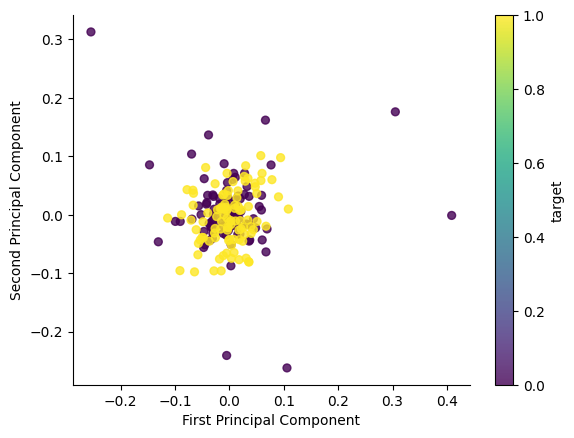

In [ ]:
pca_df.plot(kind='scatter', x='PC1', y='PC2', c='target', s=32, alpha=.8)
plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

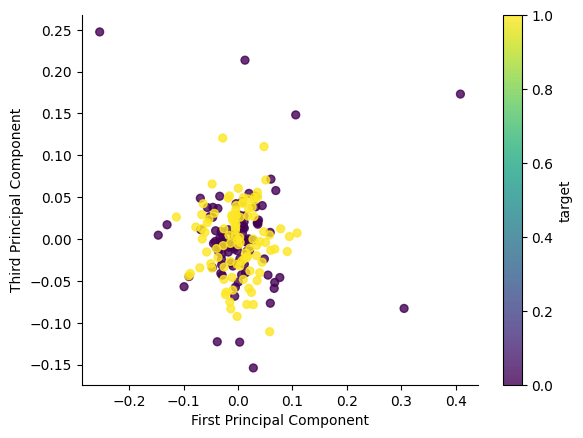

In [ ]:
pca_df.plot(kind='scatter', x='PC1', y='PC3', c='target', s=32, alpha=.8)
plt.xlabel('First Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

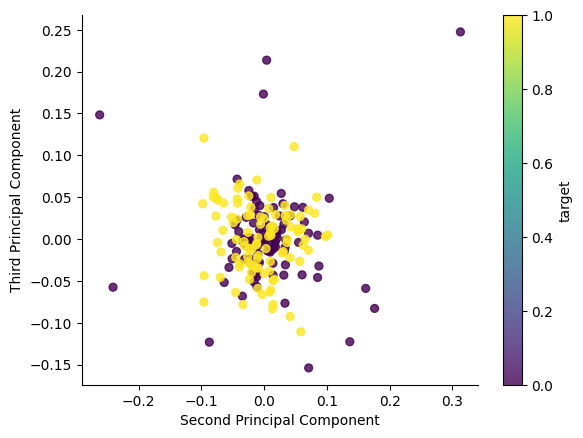

In [ ]:
pca_df.plot(kind='scatter', x='PC2', y='PC3', c='target', s=32, alpha=.8)
plt.xlabel('Second Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

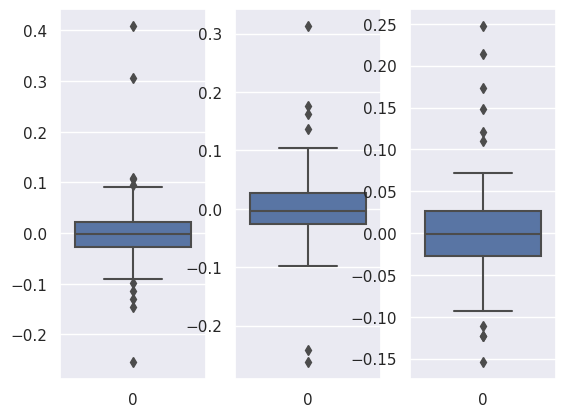

In [ ]:
# Box Plot
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3)

#create boxplot in each subplot
sns.boxplot(data=pca_df['PC1'], ax=axes[0])
sns.boxplot(data=pca_df['PC2'], ax=axes[1])
sns.boxplot(data=pca_df['PC3'], ax=axes[2])


#### MaxAbsScaler normalization


In [ ]:
scaler = MaxAbsScaler()
x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test_small)

# Restrict all the values to be between 0 and 1
x_test_norm = np.clip(x_test_norm,0,1)

In [ ]:
pca = PCA(n_components = 32)

xs_train_norm = pca.fit_transform(x_train_norm)
xs_test_norm = pca.transform(x_test_norm)

In [ ]:
three_pc_norm = pd.DataFrame(
    data=pca.components_[0:3],
    index = ['PC1', 'PC2', 'PC3']
)

In [ ]:
three_pc_norm

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
PC1,-0.088289,0.179963,-0.152478,0.172708,0.004456,0.057968,0.148815,-0.038555,0.056842,0.101920,...,0.004146,0.056346,-0.046403,0.059820,0.079378,0.056832,0.027311,0.021976,0.013616,0.018079
PC2,0.037075,0.007439,0.065940,0.042914,0.202427,0.005615,-0.033994,0.006112,-0.070246,0.093264,...,0.009230,0.239030,0.021178,-0.005179,-0.017332,0.010894,0.011215,-0.009000,-0.010088,-0.007949
PC3,0.027372,0.114360,-0.066136,0.126286,0.053287,-0.102089,-0.061799,0.059821,0.155760,0.107554,...,0.009982,-0.213324,-0.003378,-0.006481,0.000265,0.009991,0.015081,0.023333,0.024105,0.017907


In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.04519081 0.04305087 0.04040429 0.03852013 0.0358103  0.03383065
 0.03208468 0.03121227 0.03024195 0.02948633 0.02856054 0.02657779
 0.02529048 0.02499907 0.02368502 0.02338174 0.02270439 0.02130465
 0.02036222 0.01929434 0.01862555 0.01833084 0.0176221  0.01709922
 0.01623152 0.015521   0.01503582 0.01450377 0.01365743 0.01317983
 0.01273295 0.01217936]


In [ ]:
pca_norm_df = pd.DataFrame(
    data = xs_train_norm[:,0:3],
    columns = ['PC1', 'PC2', 'PC3']
)
pca_norm_df = pd.concat([pca_norm_df, pd.DataFrame(y_train, columns =['target'])[['target']]], axis=1)

In [ ]:
pca_norm_df

,PC1,PC2,PC3,target
0,-0.230297,-0.045281,0.067306,0.0
1,-0.016277,0.117728,-0.071714,0.0
2,-0.122600,-0.141607,0.226814,0.0
3,1.981290,-0.681880,-0.798570,0.0
4,0.114172,-0.504560,0.411078,0.0
...,...,...,...,...
195,-0.215890,0.986376,-0.324199,1.0
196,0.295155,-0.938925,0.137995,1.0
197,0.456633,-0.306292,0.033884,1.0
198,-0.662429,-0.903509,0.070498,1.0


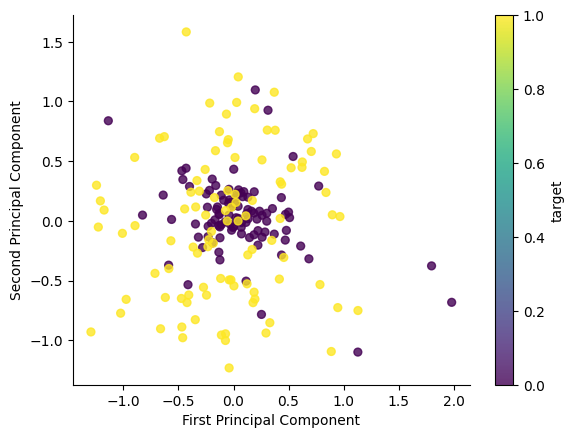

In [ ]:
pca_norm_df.plot(kind='scatter', x='PC1', y='PC2', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

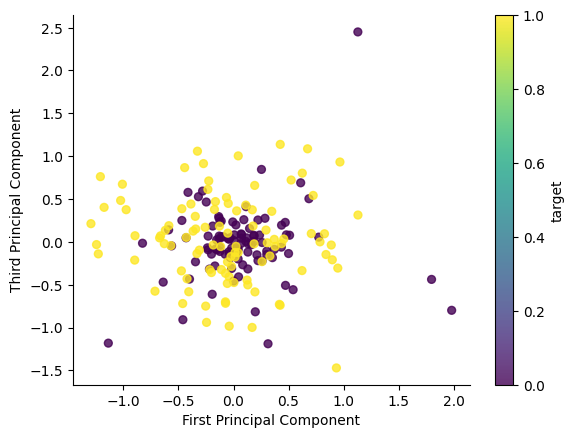

In [ ]:
pca_norm_df.plot(kind='scatter', x='PC1', y='PC3', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('First Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

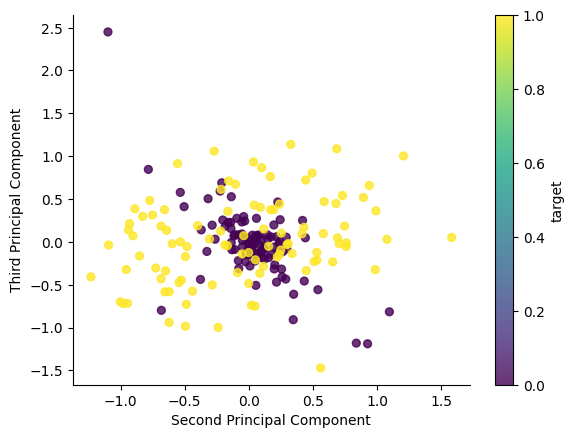

In [ ]:
pca_norm_df.plot(kind='scatter', x='PC2', y='PC3', c='target', s=32, alpha=.8, cmap='viridis')
plt.xlabel('Second Principal Component')

plt.ylabel('Third Principal Component')

plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

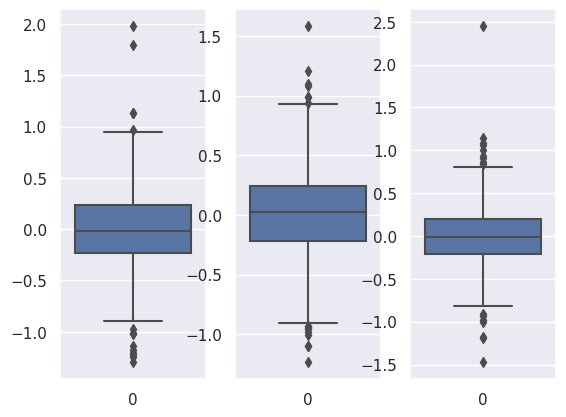

In [ ]:
# Box Plot

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3)

#create boxplot in each subplot
sns.boxplot(data=pca_norm_df['PC1'], ax=axes[0])
sns.boxplot(data=pca_norm_df['PC2'], ax=axes[1])
sns.boxplot(data=pca_norm_df['PC3'], ax=axes[2])


## Quantum Support Vector Machines

In [ ]:
svm = SVC(kernel = qkernel).fit(xs_train, y_train)

In [ ]:
y_train_pred=svm.predict(xs_train)

In [ ]:
tr_acc=accuracy_score(y_train_pred, y_train)
print("Train accuracy: ", tr_acc)

Train accuracy:  1.0


In [ ]:
y_test_pred=svm.predict(xs_test)

In [ ]:
test_acc=accuracy_score(y_test_pred, y_test_small)
print("Test accuracy: ", test_acc)

Test accuracy:  0.9666666666666667


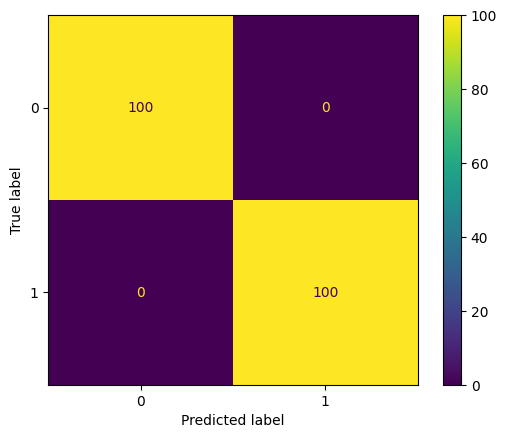

In [ ]:
# Train confussion matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

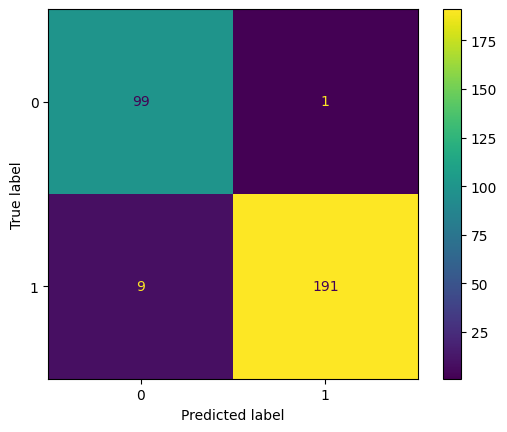

In [ ]:
# Test confussion matrix
cm = confusion_matrix(y_test_small, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Test accuracy per type
detailed_accuracy(y_test_pred, 100)

SEP accuracy:  0.99
PPT accuracy:  0.93
NPPT accuracy:  0.98


In [ ]:
model_type = SVC()
model_params = [{'kernel': [qkernel]}]
model = GridSearchCV(model_type, model_params, cv=StratifiedKFold(shuffle=True)).fit(xs_train, y_train)
print('Training results :')
print(model.best_params_)
print(model.best_score_)

Training results :
{'kernel': <function qkernel at 0x7cd0d8e4b6d0>}
0.985


Training time 12 minutes

Train Prediction time 11 minutes

Test prediction time 18 min

Five fold cross validation 1 hour

## Quantum Neural Networks

In [ ]:
def save_modelkeras(model,filename):
  dir="/content/drive/MyDrive/tfg/models/"+filename
  model.save(dir)
  print("Keras model saved")

In [ ]:
def load_modelkeras(filename):
  # Recreate the exact same model, including its weights and the optimizer
  dir="/content/drive/MyDrive/tfg/models/"+filename
  new_model = tf.keras.models.load_model(dir)
  return new_model

### TwoLocal variational form

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=10

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
# Model 1 five fold cross validation
fivefoldCV_qnn(qnn_circuit,xs_train, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 38s 5s/step - loss: 0.9669
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 0.9385
Epoch 3/50
8/8 [==============================] - 19s 3s/step - loss: 0.9041
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.8647
Epoch 5/50
8/8 [==============================] - 10s 1s/step - loss: 0.8269
Epoch 6/50
8/8 [==============================] - 26s 3s/step - loss: 0.7860
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.7511
Epoch 8/50
8/8 [==============================] - 18s 2s/step - loss: 0.7174
Epoch 9/50
8/8 [==============================] - 13s 2s/step - loss: 0.6862
Epoch 10/50
8/8 [==============================] - 11s 1s/step - loss: 0.6581
Epoch 11/50
8/8 [==============================] - 19s 3s/step - loss: 0.6350
Epoch 12/50
8/8 [==============================] - 27s

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_1 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_1.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

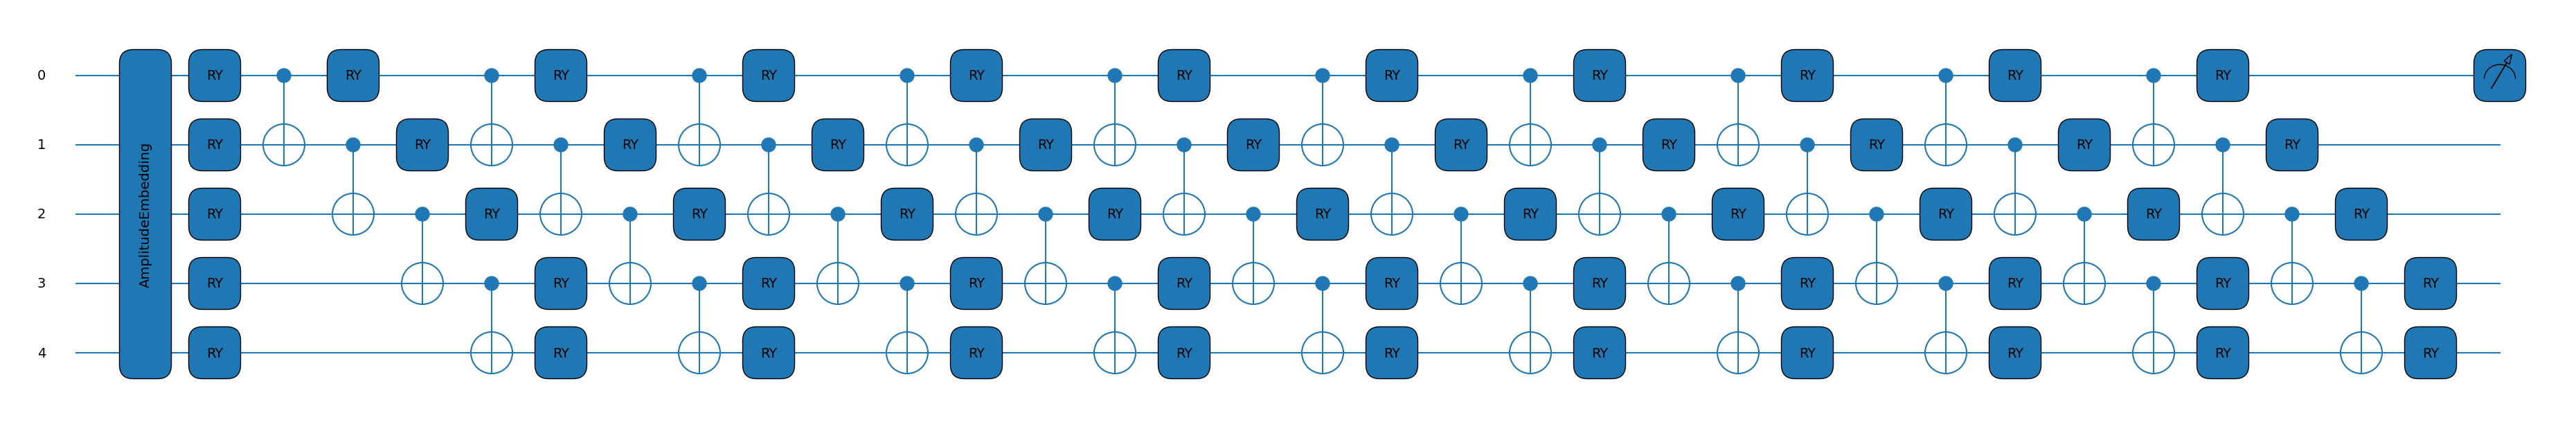

In [ ]:
nweights = 3*nreps*nqubits
theta=np.random.rand(nweights)

fig, ax = qml.draw_mpl(qnn)(xs_train,theta)
fig.show()

In [ ]:
history = model_1.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 15s 1s/step - loss: 0.9957
Epoch 2/50
10/10 [==============================] - 17s 1s/step - loss: 0.9520
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.9000
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.8447
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.7917
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.7416
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.7010
Epoch 8/50
10/10 [==============================] - 18s 2s/step - loss: 0.6609
Epoch 9/50
10/10 [==============================] - 18s 2s/step - loss: 0.6312
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.6051
Epoch 11/50
10/10 [==============================] - 18s 2s/step - loss: 0.5870
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.5707
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_1.predict(xs_train) >= 0.5
y_test_pred=model_1.predict(xs_test) >= 0.5

10/10 [==============================] - 15s 2s/step


Train accuracy:  0.84
Train F-1 score:  0.8117647058823529

Test accuracy:  0.67
Test F-1 score:  0.6816720257234727

Test accuracy broken down per type
SEP accuracy:  0.95
PPT accuracy:  0.52
NPPT accuracy:  0.54




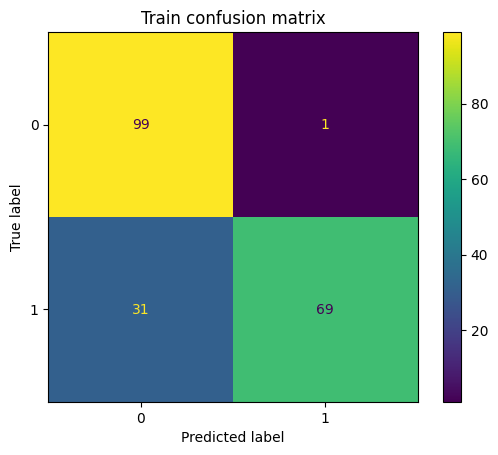

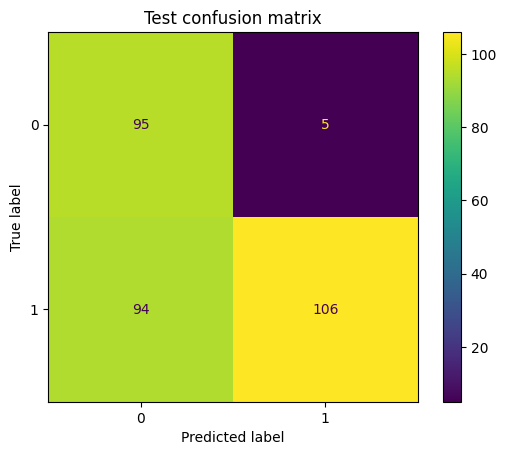

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training full dataset 14 min

#### Normalized data

In [ ]:
# Model 2 five fold cross validation (normalized data)
fivefoldCV_qnn(qnn_circuit,xs_train_norm, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 28s 3s/step - loss: 0.7485
Epoch 2/50
8/8 [==============================] - 8s 955ms/step - loss: 0.7409
Epoch 3/50
8/8 [==============================] - 14s 2s/step - loss: 0.7325
Epoch 4/50
8/8 [==============================] - 18s 2s/step - loss: 0.7234
Epoch 5/50
8/8 [==============================] - 45s 6s/step - loss: 0.7147
Epoch 6/50
8/8 [==============================] - 23s 3s/step - loss: 0.7019
Epoch 7/50
8/8 [==============================] - 19s 3s/step - loss: 0.6899
Epoch 8/50
8/8 [==============================] - 19s 3s/step - loss: 0.6742
Epoch 9/50
8/8 [==============================] - 8s 1s/step - loss: 0.6597
Epoch 10/50
8/8 [==============================] - 15s 1s/step - loss: 0.6428
Epoch 11/50
8/8 [==============================] - 14s 2s/step - loss: 0.6274
Epoch 12/50
8/8 [==============================] - 8s

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_2 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_2.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
history = model_2.fit(xs_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 17s 1s/step - loss: 0.7584
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 0.7429
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.7253
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.7032
Epoch 5/50
10/10 [==============================] - 18s 2s/step - loss: 0.6782
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.6498
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.6256
Epoch 8/50
10/10 [==============================] - 18s 2s/step - loss: 0.5988
Epoch 9/50
10/10 [==============================] - 18s 2s/step - loss: 0.5824
Epoch 10/50
10/10 [==============================] - 18s 2s/step - loss: 0.5671
Epoch 11/50
10/10 [==============================] - 18s 2s/step - loss: 0.5570
Epoch 12/50
10/10 [==============================] - 18s 2s/step - loss: 0.5487
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_2.predict(xs_train_norm) >= 0.5
y_test_pred=model_2.predict(xs_test_norm) >= 0.5

10/10 [==============================] - 13s 1s/step


Train accuracy:  0.885
Train F-1 score:  0.8700564971751412

Test accuracy:  0.7033333333333334
Test F-1 score:  0.7227414330218069

Test accuracy broken down per type
SEP accuracy:  0.95
PPT accuracy:  0.57
NPPT accuracy:  0.59




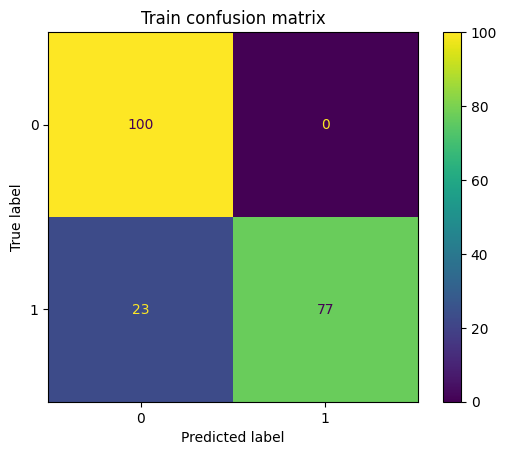

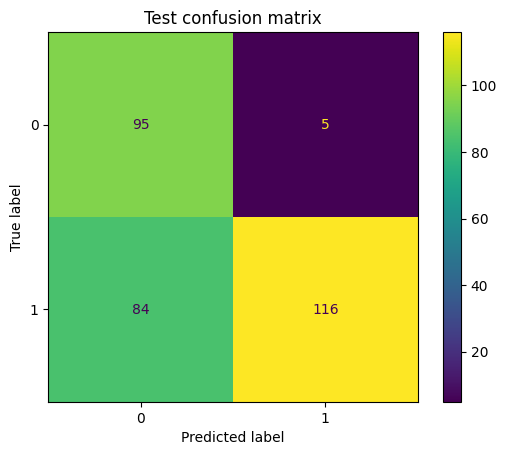

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

In [ ]:
save_modelkeras(model_3,'model_twolocal10reps_norm.h5')

Keras model saved


15 min training whole dataset

#### 20 repetitions

In [ ]:
nqubits=5
dev=qml.device("lightning.qubit", wires=nqubits)

nreps=20

def qnn_circuit(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  TwoLocal(nqubits=nqubits, theta=theta, reps=nreps)
  return qml.expval(qml.Hermitian(M, wires=[0]))

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_3 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_3.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

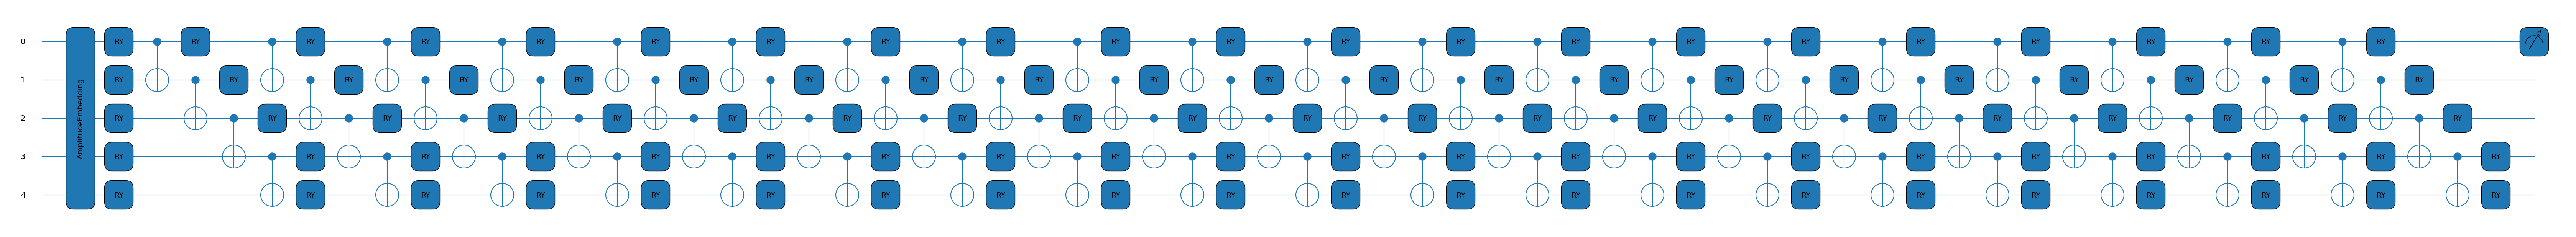

In [ ]:
nweights = 3*nreps*nqubits
theta=np.random.rand(nweights)

fig, ax = qml.draw_mpl(qnn)(xs_train,theta)
fig.show()

In [ ]:
# Training our model
history = model_3.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 28s 3s/step - loss: 0.9938
Epoch 2/50
10/10 [==============================] - 32s 3s/step - loss: 0.9200
Epoch 3/50
10/10 [==============================] - 25s 3s/step - loss: 0.8356
Epoch 4/50
10/10 [==============================] - 31s 3s/step - loss: 0.7622
Epoch 5/50
10/10 [==============================] - 26s 3s/step - loss: 0.7004
Epoch 6/50
10/10 [==============================] - 32s 3s/step - loss: 0.6468
Epoch 7/50
10/10 [==============================] - 26s 3s/step - loss: 0.6118
Epoch 8/50
10/10 [==============================] - 32s 3s/step - loss: 0.5820
Epoch 9/50
10/10 [==============================] - 26s 3s/step - loss: 0.5638
Epoch 10/50
10/10 [==============================] - 32s 3s/step - loss: 0.5511
Epoch 11/50
10/10 [==============================] - 27s 3s/step - loss: 0.5414
Epoch 12/50
10/10 [==============================] - 30s 3s/step - loss: 0.5324
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_3.predict(xs_train) >= 0.5
y_test_pred=model_3.predict(xs_test) >= 0.5

10/10 [==============================] - 19s 2s/step


Train accuracy:  0.85
Train F-1 score:  0.8235294117647058

Test accuracy:  0.6366666666666667
Test F-1 score:  0.6279863481228669

Test accuracy broken down per type
SEP accuracy:  0.99
PPT accuracy:  0.44
NPPT accuracy:  0.48




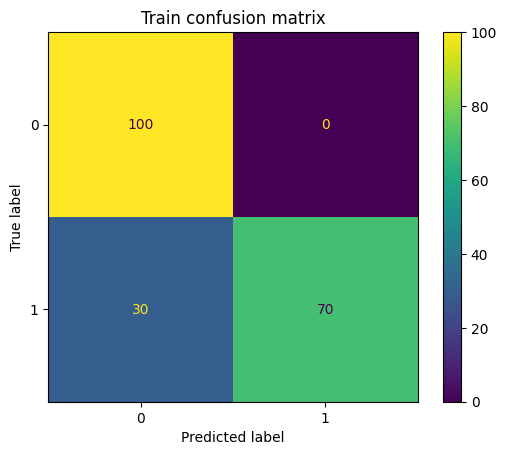

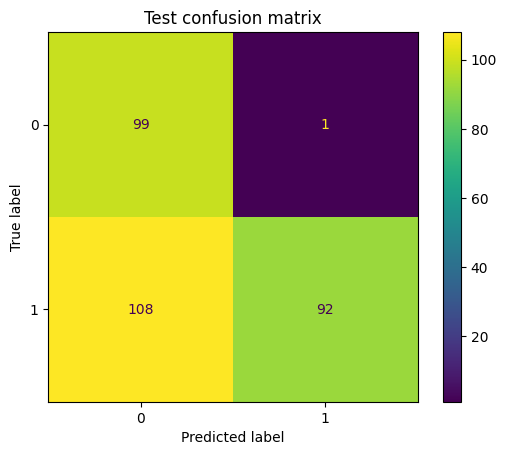

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

Training time 24 minutes

#### 20 repetitions, normalized data

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn = qml.QNode(qnn_circuit, dev, interface="tf", diff_method=method)

nweights = 3*nreps*nqubits

weights={"theta": nweights}

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn, weights, output_dim=1)

# keras model
model_3n = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_3n.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model_3n.fit(xs_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 32s 3s/step - loss: 0.7562
Epoch 2/50
10/10 [==============================] - 26s 3s/step - loss: 0.7098
Epoch 3/50
10/10 [==============================] - 32s 3s/step - loss: 0.6554
Epoch 4/50
10/10 [==============================] - 25s 3s/step - loss: 0.6068
Epoch 5/50
10/10 [==============================] - 31s 3s/step - loss: 0.5766
Epoch 6/50
10/10 [==============================] - 26s 3s/step - loss: 0.5606
Epoch 7/50
10/10 [==============================] - 31s 3s/step - loss: 0.5514
Epoch 8/50
10/10 [==============================] - 27s 3s/step - loss: 0.5414
Epoch 9/50
10/10 [==============================] - 29s 3s/step - loss: 0.5329
Epoch 10/50
10/10 [==============================] - 27s 3s/step - loss: 0.5239
Epoch 11/50
10/10 [==============================] - 31s 3s/step - loss: 0.5150
Epoch 12/50
10/10 [==============================] - 27s 3s/step - loss: 0.5062
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_3n.predict(xs_train_norm) >= 0.5
y_test_pred=model_3n.predict(xs_test_norm) >= 0.5

10/10 [==============================] - 19s 2s/step


Train accuracy:  0.945
Train F-1 score:  0.9417989417989417

Test accuracy:  0.8066666666666666
Test F-1 score:  0.8333333333333334

Test accuracy broken down per type
SEP accuracy:  0.97
PPT accuracy:  0.76
NPPT accuracy:  0.69




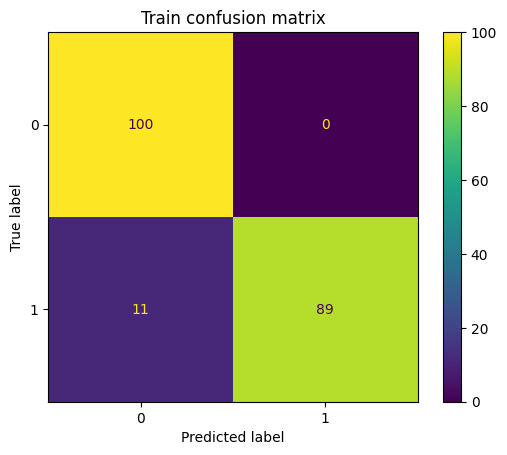

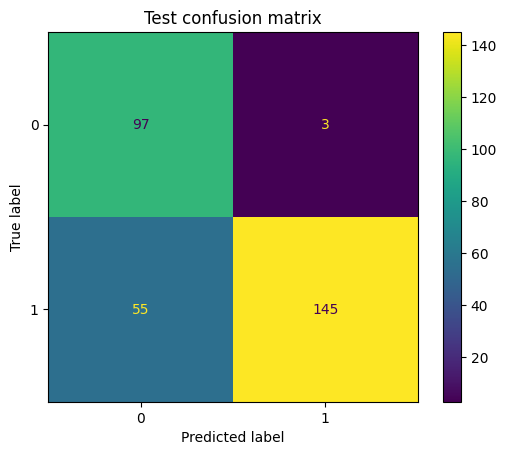

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

In [ ]:
save_modelkeras(model_3n,'model_twolocal20reps_norm.h5')


Keras model saved


Training time 24 minutes

### StrongEntanglingLayers

In [ ]:
nqubits=5
dev = qml.device("lightning.qubit", wires=nqubits)

# number of repetitions that we want in each instance of the variational form
nreps = 8
#  dimensions of the input that the variational form expects
weights_dim = qml.StronglyEntanglingLayers.shape(n_layers = nreps, n_wires = nqubits)
#  number of inputs that each instance of the variational form will take
nweights = 3*nreps*nqubits

def qnn_circuit_strong(inputs, theta):
  qml.AmplitudeEmbedding([a for a in inputs], wires=range(nqubits), pad_with=0, normalize=True)
  # reshape the theta array of parameters to make it fit into the shape that
  # the variational form expects
  theta1 = tf.reshape(theta, weights_dim)
  qml.StronglyEntanglingLayers(weights = theta1, wires = range(nqubits))

  return qml.expval(qml.Hermitian(M, wires = [0]))

# dictionary we would send to TensorFlow when constructing the Keras layer
weights_strong = {"theta": nweights}

In [ ]:
# Model 4 five fold cross validation
fivefoldCV_qnn(qnn_circuit_strong,xs_train, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 37s 5s/step - loss: 0.7816
Epoch 2/50
8/8 [==============================] - 23s 3s/step - loss: 0.7663
Epoch 3/50
8/8 [==============================] - 25s 3s/step - loss: 0.7507
Epoch 4/50
8/8 [==============================] - 25s 3s/step - loss: 0.7318
Epoch 5/50
8/8 [==============================] - 22s 3s/step - loss: 0.7145
Epoch 6/50
8/8 [==============================] - 31s 4s/step - loss: 0.6937
Epoch 7/50
8/8 [==============================] - 27s 3s/step - loss: 0.6751
Epoch 8/50
8/8 [==============================] - 22s 3s/step - loss: 0.6574
Epoch 9/50
8/8 [==============================] - 23s 3s/step - loss: 0.6385
Epoch 10/50
8/8 [==============================] - 25s 3s/step - loss: 0.6215
Epoch 11/50
8/8 [==============================] - 26s 3s/step - loss: 0.6064
Epoch 12/50
8/8 [==============================] - 22s

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model_4 = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_4.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# Training our model
history = model_4.fit(xs_train, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 44s 5s/step - loss: 0.7748
Epoch 2/50
10/10 [==============================] - 60s 6s/step - loss: 0.7602
Epoch 3/50
10/10 [==============================] - 39s 4s/step - loss: 0.7416
Epoch 4/50
10/10 [==============================] - 34s 3s/step - loss: 0.7220
Epoch 5/50
10/10 [==============================] - 32s 3s/step - loss: 0.6990
Epoch 6/50
10/10 [==============================] - 29s 3s/step - loss: 0.6748
Epoch 7/50
10/10 [==============================] - 34s 4s/step - loss: 0.6531
Epoch 8/50
10/10 [==============================] - 31s 3s/step - loss: 0.6322
Epoch 9/50
10/10 [==============================] - 30s 3s/step - loss: 0.6138
Epoch 10/50
10/10 [==============================] - 37s 4s/step - loss: 0.5978
Epoch 11/50
10/10 [==============================] - 37s 4s/step - loss: 0.5850
Epoch 12/50
10/10 [==============================] - 34s 3s/step - loss: 0.5734
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_4.predict(xs_train) >= 0.5
y_test_pred=model_4.predict(xs_test) >= 0.5

10/10 [==============================] - 20s 2s/step


Train accuracy:  0.84
Train F-1 score:  0.8095238095238095

Test accuracy:  0.6566666666666666
Test F-1 score:  0.6600660066006601

Test accuracy broken down per type
SEP accuracy:  0.97
PPT accuracy:  0.5
NPPT accuracy:  0.5




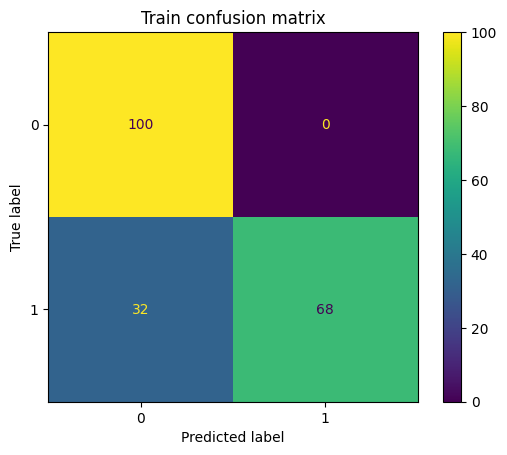

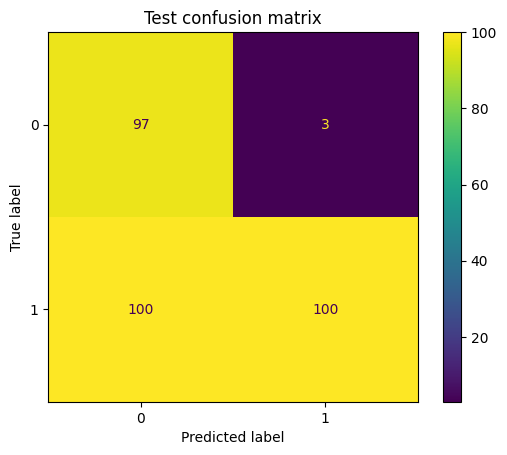

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

five fold cross validation 2h

28 min training full training set

#### Normalized data

In [ ]:
# Model 4n five fold cross validation (normalized data)
fivefoldCV_qnn(qnn_circuit_strong,xs_train_norm, y_train)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
8/8 [==============================] - 34s 3s/step - loss: 0.7953
Epoch 2/50
8/8 [==============================] - 61s 8s/step - loss: 0.7768
Epoch 3/50
8/8 [==============================] - 41s 5s/step - loss: 0.7604
Epoch 4/50
8/8 [==============================] - 23s 3s/step - loss: 0.7429
Epoch 5/50
8/8 [==============================] - 24s 3s/step - loss: 0.7271
Epoch 6/50
8/8 [==============================] - 29s 4s/step - loss: 0.7105
Epoch 7/50
8/8 [==============================] - 22s 3s/step - loss: 0.6928
Epoch 8/50
8/8 [==============================] - 23s 3s/step - loss: 0.6756
Epoch 9/50
8/8 [==============================] - 25s 3s/step - loss: 0.6575
Epoch 10/50
8/8 [==============================] - 26s 3s/step - loss: 0.6393
Epoch 11/50
8/8 [==============================] - 22s 3s/step - loss: 0.6234
Epoch 12/50
8/8 [==============================] - 35s

In [ ]:
method= "adjoint"

tf.random.set_seed(seed)

qnn_strong = qml.QNode(qnn_circuit_strong, dev, interface="tf", diff_method=method)

# Keras layer containing qnn
qlayer=qml.qnn.KerasLayer(qnn_strong, weights_strong, output_dim=1)

# keras model
model_4n = tf.keras.models.Sequential([qlayer])

# we choose adam optimizer with a learning rate of 0.005
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# binary cross entropy loss, because we are training a binary classifier
model_4n.compile(opt, loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
history = model_4n.fit(xs_train_norm, y_train, epochs = 50, shuffle = True,
                    validation_data = None, batch_size = 20)

Epoch 1/50
10/10 [==============================] - 31s 3s/step - loss: 0.7059
Epoch 2/50
10/10 [==============================] - 34s 4s/step - loss: 0.6890
Epoch 3/50
10/10 [==============================] - 28s 3s/step - loss: 0.6716
Epoch 4/50
10/10 [==============================] - 34s 3s/step - loss: 0.6552
Epoch 5/50
10/10 [==============================] - 34s 4s/step - loss: 0.6380
Epoch 6/50
10/10 [==============================] - 28s 3s/step - loss: 0.6197
Epoch 7/50
10/10 [==============================] - 33s 3s/step - loss: 0.6033
Epoch 8/50
10/10 [==============================] - 34s 4s/step - loss: 0.5854
Epoch 9/50
10/10 [==============================] - 28s 3s/step - loss: 0.5729
Epoch 10/50
10/10 [==============================] - 32s 3s/step - loss: 0.5596
Epoch 11/50
10/10 [==============================] - 34s 4s/step - loss: 0.5500
Epoch 12/50
10/10 [==============================] - 27s 3s/step - loss: 0.5419
Epoch 13/50
10/10 [==============================

In [ ]:
y_train_pred=model_4n.predict(xs_train_norm) >= 0.5
y_test_pred=model_4n.predict(xs_test_norm) >= 0.5


10/10 [==============================] - 21s 2s/step


Train accuracy:  0.91
Train F-1 score:  0.9010989010989011

Test accuracy:  0.7233333333333334
Test F-1 score:  0.7565982404692083

Test accuracy broken down per type
SEP accuracy:  0.88
PPT accuracy:  0.69
NPPT accuracy:  0.6




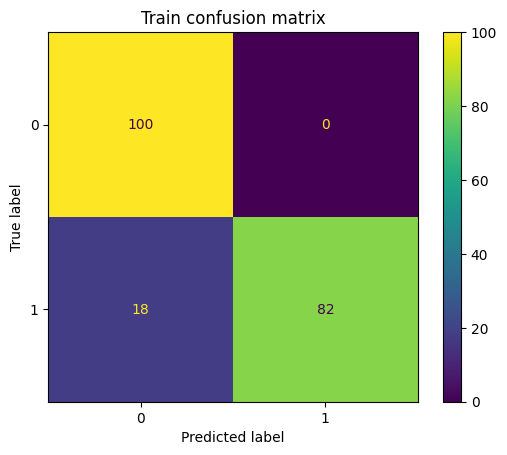

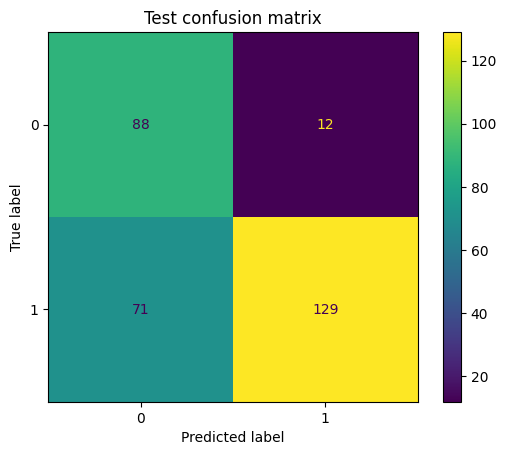

In [ ]:
performance(y_train_pred, y_train, y_test_pred, y_test_small)

In [ ]:
save_modelkeras(model_4n,'model_strongentangling8reps_norm.h5')

Keras model saved


Five fold cross validation 2h

Training time full training set 24 min